 # House Price Prediction
 
 # Introduction
 <font color = 'green'>


**1.** [Business Problem](#1)
    
**2.** [About Dataset](#2)
    
**3.** [Data Loading & Checking](#3)
    
**4.** [Exploratory Data Analysis (EDA)](#4)
   
* **4.1** [Analysis of Categorical Variables](#5)
* **4.2** [Analysis of Numerical Variables](#6)
* **4.3** [Target Variable Analysis](#7)
* **4.4** [Outlier Analysis](#8)
* **4.5** [Correlation Analysis](#9)
    
**5.** [Data Preprocessing](#10)
    
* **5.1** [Missing Values ](#11)
* **5.2** [Outlier Supression](#12)
* **5.3** [Encoding for Base Model](#13)
* **5.4** [Scaling for Base Model](#14)
    
**6.** [Base Model](#15)
    
* **6.1** [Hold-out Method](#16)
* **6.2** [Modeling](#17)
* **6.3** [Model Performance Evaluation](#18)
    
**7.** [Feature Engineering](#19)
    
* **7.1** [Feature Extraction](#20)
* **7.2** [Encoding for Current & New Features](#21)
* **7.3** [Feature Scaling](#22)
    
**8.** [Model](#23)
    
* **8.1** [Hold-out Method](#24)
* **8.2** [Modeling](#25)
* **8.3** [Model Performance Evaluation](#26)
* **8.4** [Cross Validation](#27)

**9.** [Hyperparameter Tuning](#28)
    
* **9.1** [Determining Parameters](#29)
* **9.2** [Best Parameters & Best Scores](#30)   
    
**10.** [Final Model](#31)   
* **10.1** [Modeling](#32)
* **10.2** [Cross Validation](#33)
* **10.3** [Feature Importance](#34)
* **10.4** [Prediction](#35)
* **10.5** [Creating a Submission File](#36)

<a id = "1"></a><br>
## 1. Business Problem

A machine learning project is desired to predict prices of different types of houses using a dataset containing features of each house and their respective prices.

<a id = "2"></a>
## 2. About Dataset

The dataset for this project, which includes housing units in Ames, Iowa, contains 79 explanatory variables. You can access the dataset and competition page on Kaggle using the link below. Since it’s part of a Kaggle competition, there are two separate CSV files: one for training data and another for testing data. In the test dataset, house prices are left blank, and you’re expected to predict these values.

* **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
* **MSSubClass:** The building class
* **MSZoning:** The general zoning classification
* **LotFrontage:** Linear feet of street connected to property
* **LotArea:** Lot size in square feet
* **Street:** Type of road access
* **Alley:** Type of alley access
* **LotShape:** General shape of property
* **LandContour:** Flatness of the property
* **Utilities:** Type of utilities available
* **LotConfig:** Lot configuration
* **LandSlope:** Slope of property
* **Neighborhood:** Physical locations within Ames city limits
* **Condition1:** Proximity to main road or railroad
* **Condition2:** Proximity to main road or railroad (if a second is present)
* **BldgType:** Type of dwelling
* **HouseStyle:** Style of dwelling
* **OverallQual:** Overall material and finish quality
* **OverallCond:** Overall condition rating
* **YearBuilt:** Original construction date
* **YearRemodAdd:** Remodel date
* **RoofStyle:** Type of roof
* **RoofMatl:** Roof material
* **Exterior1st:** Exterior covering on house
* **Exterior2nd:** Exterior covering on house (if more than one material)
* **MasVnrType:** Masonry veneer type
* **MasVnrArea:** Masonry veneer area in square feet
* **ExterQual:** Exterior material quality
* **ExterCond:** Present condition of the material on the exterior
* **Foundation:** Type of foundation
* **BsmtQual:** Height of the basement
* **BsmtCond:** General condition of the basement
* **BsmtExposure:** Walkout or garden level basement walls
* **BsmtFinType1:** Quality of basement finished area
* **BsmtFinSF1:** Type 1 finished square feet
* **BsmtFinType2:** Quality of second finished area (if present)
* **BsmtFinSF2:** Type 2 finished square feet
* **BsmtUnfSF:** Unfinished square feet of basement area
* **TotalBsmtSF:** Total square feet of basement area
* **Heating:** Type of heating
* **HeatingQC:** Heating quality and condition
* **CentralAir:** Central air conditioning
* **Electrical:** Electrical system
* **1stFlrSF:** First Floor square feet
* **2ndFlrSF:** Second floor square feet
* **LowQualFinSF:** Low quality finished square feet (all floors)
* **GrLivArea:** Above grade (ground) living area square feet
* **BsmtFullBath:** Basement full bathrooms
* **BsmtHalfBath:** Basement half bathrooms
* **FullBath:** Full bathrooms above grade
* **HalfBath:** Half baths above grade
* **Bedroom:** Number of bedrooms above basement level
* **Kitchen:** Number of kitchens
* **KitchenQual:** Kitchen quality
* **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
* **Functional:** Home functionality rating
* **Fireplaces:** Number of fireplaces
* **FireplaceQu:** Fireplace quality
* **GarageType:** Garage location
* **GarageYrBlt:** Year garage was built
* **GarageFinish:** Interior finish of the garage
* **GarageCars:** Size of garage in car capacity
* **GarageArea:** Size of garage in square feet
* **GarageQual:** Garage quality
* **GarageCond:** Garage condition
* **PavedDrive:** Paved driveway
* **WoodDeckSF:** Wood deck area in square feet
* **OpenPorchSF:** Open porch area in square feet
* **EnclosedPorch:** Enclosed porch area in square feet
* **3SsnPorch:** Three season porch area in square feet
* **ScreenPorch:** Screen porch area in square feet
* **PoolArea:** Pool area in square feet
* **PoolQC:** Pool quality
* **Fence:** Fence quality
* **MiscFeature:** Miscellaneous feature not covered in other categories
* **MiscVal:** $Value of miscellaneous feature
* **MoSold:** Month Sold
* **YrSold:** Year Sold
* **SaleType:** Type of sale
* **SaleCondition:** Condition of sale

<a id = "3"></a><br>
## 3. Data Loading & Checking

In [1]:
!pip install missingno as msno
!pip install pydotplus
!pip install astor
!pip install joblib
!pip install skompiler

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder,RobustScaler

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression,Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import joblib 
import pydotplus
from skompiler import skompile
import datetime as dt

from sklearn.pipeline import Pipeline

import warnings
warnings.simplefilter(action="ignore")
from sklearn.exceptions import ConvergenceWarning

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.width", 500)

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24552 sha256=ce21a8498cc4c8fb985dfd360ac923a4be9dce1934a6a33dd7a6dde7b9c38875
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for skompiler: filename=SKompiler-0.7-py3-none-any.whl size=54311 sha256=681528be47d7ce22dc6ece2775705fc4f0599eceda886a6842d6e780ab2cd80e
  Stored in directory: /root/.cache/pip/wheels/c0/22/3d/bd8fd4c6cd205cf122a0974be908681472a6f44abd6b880614
Successfully built skompiler


In [2]:
#upload the dataset:

train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv') 
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0   
1   2          20       RL       80.000     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0   
2   3          60       RL       68.000    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0   
3   4          70       RL       60.000     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0   
4   5          60       RL       84.000    14260   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc       Gd       TA           Av          GLQ         655          Unf           0        490         1145    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd     2003.000          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500  
1       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd     1976.000          RFn           2        

In [4]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0  1461          20       RH       80.000    11622   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961          1961     Gable  CompShg     VinylSd     VinylSd        NaN       0.000        TA        TA     CBlock       TA       TA           No          Rec     468.000          LwQ     144.000    270.000      882.000    GasA        TA          Y      SBrkr       896         0             0   
1  1462          20       RL       81.000    14267   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace     108.000        TA        TA     CBlock       TA       TA           No          ALQ     923.000          Unf       0.000    406.000     1329.000    GasA        TA          Y      SBrkr      1329         0             0   
2  1463          60       RL       74.000    13830   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997          1998     Gable  CompShg     VinylSd     VinylSd        NaN       0.000        TA        TA      PConc       Gd       TA           No          GLQ     791.000          Unf       0.000    137.000      928.000    GasA        Gd          Y      SBrkr       928       701             0   
3  1464          60       RL       78.000     9978   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            6       1998          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace      20.000        TA        TA      PConc       TA       TA           No          GLQ     602.000          Unf       0.000    324.000      926.000    GasA        Ex          Y      SBrkr       926       678             0   
4  1465         120       RL       43.000     5005   Pave   NaN      IR1         HLS    AllPub    Inside       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story            8            5       1992          1992     Gable  CompShg     HdBoard     HdBoard        NaN       0.000        Gd        TA      PConc       Gd       TA           No          ALQ     263.000          Unf       0.000   1017.000     1280.000    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  
0        896         0.000         0.000         1         0             2             1          TA             5        Typ           0         NaN     Attchd     1961.000          Unf       1.000     730.000         TA         TA          Y         140            0              0          0          120         0    NaN  MnPrv         NaN        0       6    2010       WD        Normal  
1       1329         0.000         0.000         1         1             3             1          Gd             6        Typ           0         NaN     Attchd     1958.000          Unf       1.000     312.000      

In [5]:
df_ = pd.concat([train, test], ignore_index=False)

In [6]:
# defining a function to upload the dataset

def load(dataframe): 
    df = dataframe.copy()
    return df

In [7]:
df = load(df_) # copy of the dataset
df.head()  # display first 5 rows

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ     706.000          Unf       0.000    150.000      856.000    GasA        Ex          Y      SBrkr       856       854             0   
1   2          20       RL       80.000     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ     978.000          Unf       0.000    284.000     1262.000    GasA        Ex          Y      SBrkr      1262         0             0   
2   3          60       RL       68.000    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ     486.000          Unf       0.000    434.000      920.000    GasA        Ex          Y      SBrkr       920       866             0   
3   4          70       RL       60.000     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ     216.000          Unf       0.000    540.000      756.000    GasA        Gd          Y      SBrkr       961       756             0   
4   5          60       RL       84.000    14260   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc       Gd       TA           Av          GLQ     655.000          Unf       0.000    490.000     1145.000    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0       1710         1.000         0.000         2         1             3             1          Gd             8        Typ           0         NaN     Attchd     2003.000          RFn       2.000     548.000         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal 208500.000  
1       1262         0.000         1.000         2         0             3             1          TA             6        Typ           1          TA     Attchd     1976.000          RFn       2.000     460

<a id = "4"></a>
## 4. Exploratory Data Analysis

In [8]:
# defining function to check all: 

def check_df(dataframe,head = 5):
    print("##################### SHAPE ####################")
    print(dataframe.shape)
    print("#################### COLUMNS ###################")
    print(dataframe.columns)
    print("#################### INDEX ###################")
    print(dataframe.index)
    print("#################### TYPES ##################")
    print(dataframe.dtypes)
    print("#################### NA ANY ###################")
    print(dataframe.isnull().values.any())
    print(f"#################### NA SUM - RATIO ####################")
    print(pd.DataFrame({"na_sum": dataframe.isnull().sum(),
                        "ratio": dataframe.isnull().sum() / dataframe.shape[0]}))
    print("#################### QUANTILES ###############")
    print(dataframe.describe().T)

check_df(df)

##################### SHAPE ####################
(2919, 81)
#################### COLUMNS ###################
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 

In [9]:
# converting dtypes for date columns:

date_year = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
for col in date_year:
    df[col] = pd.to_datetime(df[col],format='%Y').dt.year

In [10]:
# converting dtypes for date columns:

date_months = ['MoSold']
for col in date_months:
    df[col] = pd.to_datetime(df[col], format='%m').dt.month

In [11]:
#checking:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [12]:
#checking:

df[['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']].head()

YearBuilt  YearRemodAdd  GarageYrBlt  MoSold  YrSold
0       2003          2003     2003.000       2    2008
1       1976          1976     1976.000       5    2007
2       2001          2002     2001.000       9    2008
3       1915          1970     1998.000       2    2006
4       2000          2000     2000.000      12    2008

In [13]:
# Capturing numeric and categorical variables:

def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    # cat_cols, cat_but_car:
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    # num_cols:
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    return cat_cols, num_cols , cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [14]:
print(f"Categoric columns:{len(cat_cols)}") # categorical columns
print(f"Numeric columns:{len(num_cols)}") # numeric columns
print(f"Cardinal columns:{len(cat_but_car)}") # categorical type but cardinal columns
print(f"Checking: total columns(cat_num_car):{len(cat_cols + num_cols + cat_but_car)} , dataset total columns:{len(df.columns)}")

Categoric columns:52
Numeric columns:28
Cardinal columns:1
Checking: total columns(cat_num_car):81 , dataset total columns:81


In [15]:
cat_but_car # categorical type but cardinal columns

['Neighborhood']

> **Editing column types which we need:**

In [16]:
# defining a function to update cat_cols & num_cols by cat_but_car:

def col_types_updating_with_id_columns(dataframe,id_cols,car_but_cat_cols = [],cat_but_num_wrong = [],date_columns =[]):
    # updating num_cols,cat_cols:
    cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
    for col in cat_but_car:    
        if len(cat_but_car) > 0:
            num_cols.append(col)
            cat_cols.append(col)
            num_cols = [n_col for n_col in num_cols if (n_col not in id_cols) & (n_col not in car_but_cat_cols)]
            cat_cols = [c_col for c_col in cat_cols if (c_col not in id_cols) & (c_col not in num_cols)]
        else:continue
    for col in cat_but_num_wrong:    
        if len(cat_but_num_wrong) > 0:
            cat_cols.append(col)
            num_cols.remove(col)
            cat_cols = [c_col for c_col in cat_cols if (c_col not in id_cols)]
        else:continue 
    for col in date_columns:    
        if len(date_columns) > 0:
            if col in cat_cols:
                cat_cols.remove(col)
            if col in num_cols:
                num_cols.remove(col)
            date_cols = [d_col for d_col in date_columns if (d_col not in id_cols)]
        else:continue  
    return num_cols,cat_cols,date_cols

In [17]:
#id lists:

ids = ['Id']

In [18]:
# changing the categoric columns but in cat_but_car:

car_but_cat_cols = ['Neighborhood']

In [19]:
# changing the categoric columns but in num_cols:

cat_but_num_wrong = ["MSSubClass","OverallQual"] 

In [20]:
date_cols = ["MoSold","YrSold","GarageYrBlt","YearBuilt","YearRemodAdd"]

In [21]:
# applying the function:

num_cols,cat_cols,date_cols = col_types_updating_with_id_columns(df,ids,car_but_cat_cols,cat_but_num_wrong,date_cols)

In [22]:
cat_but_car

['Neighborhood']

In [23]:
date_cols

['MoSold', 'YrSold', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd']

In [24]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'Neighborhood',
 'MSSubClass',
 'OverallQual']

In [25]:
num_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [26]:
#defining a function to change dtypes:

def update_not_correct_dtype(dataframe,num_cols,cat_cols):
    not_correct_dtype_n = [col for col in num_cols if dataframe[col].dtypes not in ["float64","int64","int32","datetime64[ns]"]]
    not_correct_dtype_c = [col for col in cat_cols if dataframe[col].dtypes not in ["O","category","datetime64[ns]"]]
    if len(not_correct_dtype_n) > 0:
        for col in not_correct_dtype_n:
            dataframe[col] = dataframe[col].astype("float64")
    if len(not_correct_dtype_c) > 0:    
        for col in not_correct_dtype_c:
            dataframe[col] = dataframe[col].astype("O")
    return not_correct_dtype_n,not_correct_dtype_c

In [27]:
# applying the function:
update_not_correct_dtype(df,num_cols,cat_cols)

([],
 ['OverallCond',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'Fireplaces',
  'GarageCars',
  'MSSubClass',
  'OverallQual'])

In [28]:
#checking:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   object 
 18  OverallCond  

<a id = "5"></a>
### 4.1 Analysis of Categorical Variables

In [29]:
# defining a function to check summary of the categorical variables:

def cat_summary(dataframe,col_name,plot = False):
    print(f"#################### {col_name} Counts - Ratio ####################")
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print(f"#################### {col_name} Unique Variable Counts ####################")
    print(f"{col_name} : {dataframe[col_name].nunique()}")
    if plot:
        print(f"#################### {col_name} Counts - Ratio Visualizing ####################")
    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show(block = True)

#################### MSZoning Counts - Ratio ####################
          MSZoning  Ratio
MSZoning                 
RL            2265 77.595
RM             460 15.759
FV             139  4.762
RH              26  0.891
C (all)         25  0.856
#################### MSZoning Unique Variable Counts ####################
MSZoning : 5
#################### MSZoning Counts - Ratio Visualizing ####################


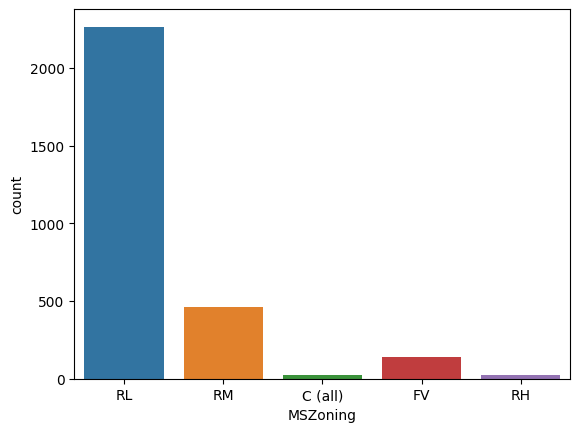

#################### Street Counts - Ratio ####################
        Street  Ratio
Street               
Pave      2907 99.589
Grvl        12  0.411
#################### Street Unique Variable Counts ####################
Street : 2
#################### Street Counts - Ratio Visualizing ####################


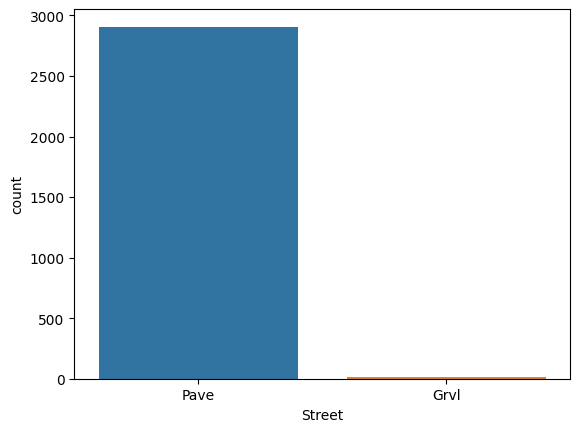

#################### Alley Counts - Ratio ####################
       Alley  Ratio
Alley              
Grvl     120  4.111
Pave      78  2.672
#################### Alley Unique Variable Counts ####################
Alley : 2
#################### Alley Counts - Ratio Visualizing ####################


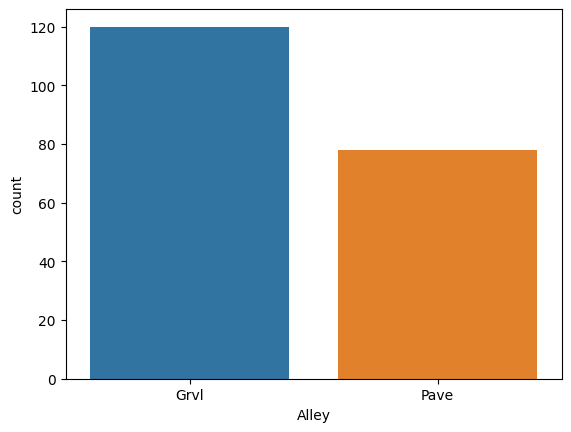

#################### LotShape Counts - Ratio ####################
          LotShape  Ratio
LotShape                 
Reg           1859 63.686
IR1            968 33.162
IR2             76  2.604
IR3             16  0.548
#################### LotShape Unique Variable Counts ####################
LotShape : 4
#################### LotShape Counts - Ratio Visualizing ####################


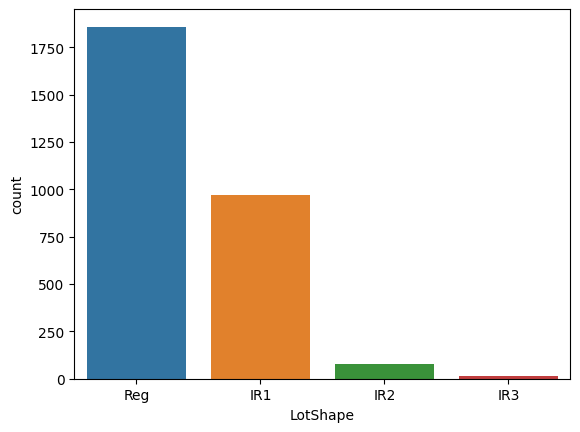

#################### LandContour Counts - Ratio ####################
             LandContour  Ratio
LandContour                    
Lvl                 2622 89.825
HLS                  120  4.111
Bnk                  117  4.008
Low                   60  2.055
#################### LandContour Unique Variable Counts ####################
LandContour : 4
#################### LandContour Counts - Ratio Visualizing ####################


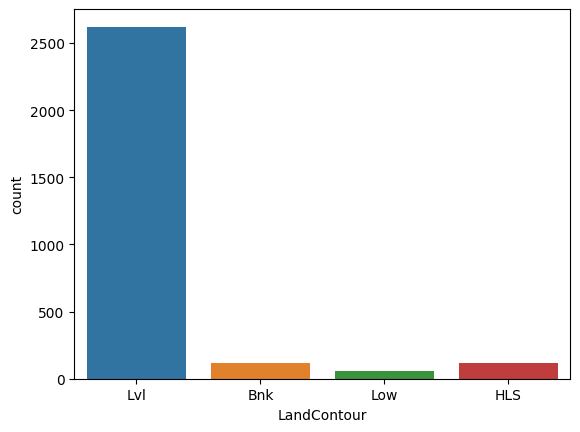

#################### Utilities Counts - Ratio ####################
           Utilities  Ratio
Utilities                  
AllPub          2916 99.897
NoSeWa             1  0.034
#################### Utilities Unique Variable Counts ####################
Utilities : 2
#################### Utilities Counts - Ratio Visualizing ####################


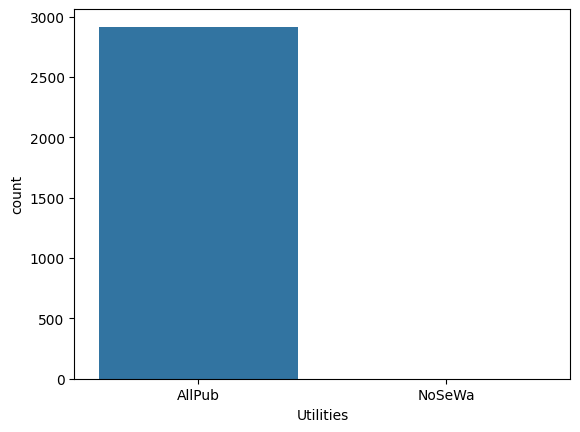

#################### LotConfig Counts - Ratio ####################
           LotConfig  Ratio
LotConfig                  
Inside          2133 73.073
Corner           511 17.506
CulDSac          176  6.029
FR2               85  2.912
FR3               14  0.480
#################### LotConfig Unique Variable Counts ####################
LotConfig : 5
#################### LotConfig Counts - Ratio Visualizing ####################


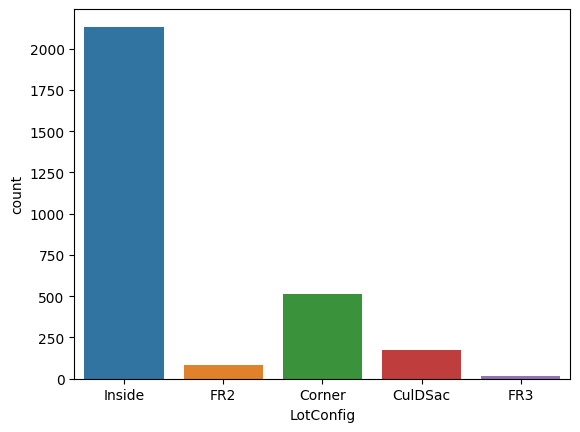

#################### LandSlope Counts - Ratio ####################
           LandSlope  Ratio
LandSlope                  
Gtl             2778 95.170
Mod              125  4.282
Sev               16  0.548
#################### LandSlope Unique Variable Counts ####################
LandSlope : 3
#################### LandSlope Counts - Ratio Visualizing ####################


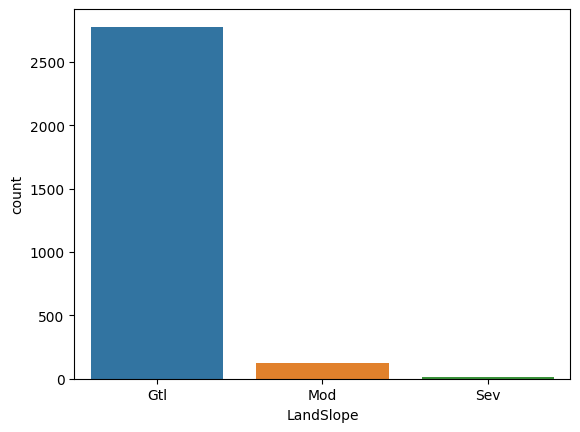

#################### Condition1 Counts - Ratio ####################
            Condition1  Ratio
Condition1                   
Norm              2511 86.023
Feedr              164  5.618
Artery              92  3.152
RRAn                50  1.713
PosN                39  1.336
RRAe                28  0.959
PosA                20  0.685
RRNn                 9  0.308
RRNe                 6  0.206
#################### Condition1 Unique Variable Counts ####################
Condition1 : 9
#################### Condition1 Counts - Ratio Visualizing ####################


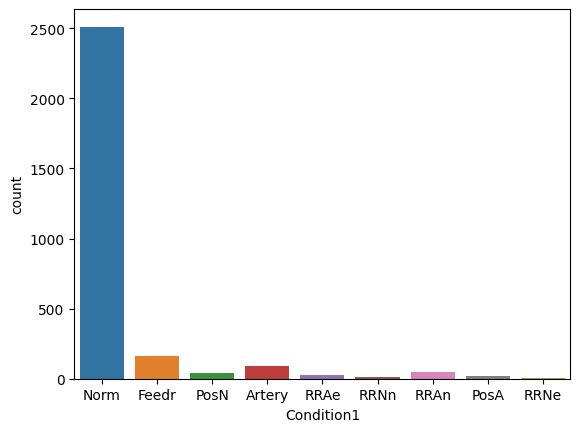

#################### Condition2 Counts - Ratio ####################
            Condition2  Ratio
Condition2                   
Norm              2889 98.972
Feedr               13  0.445
Artery               5  0.171
PosN                 4  0.137
PosA                 4  0.137
RRNn                 2  0.069
RRAn                 1  0.034
RRAe                 1  0.034
#################### Condition2 Unique Variable Counts ####################
Condition2 : 8
#################### Condition2 Counts - Ratio Visualizing ####################


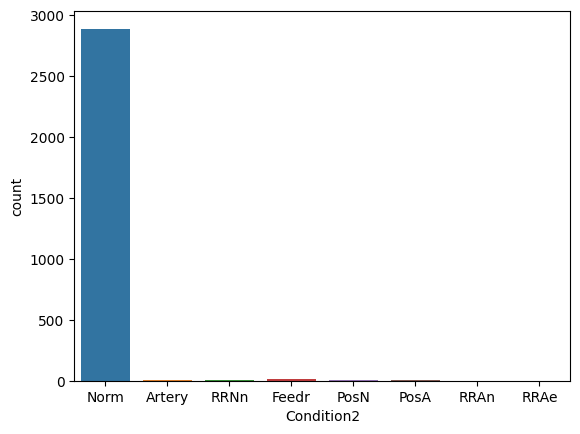

#################### BldgType Counts - Ratio ####################
          BldgType  Ratio
BldgType                 
1Fam          2425 83.076
TwnhsE         227  7.777
Duplex         109  3.734
Twnhs           96  3.289
2fmCon          62  2.124
#################### BldgType Unique Variable Counts ####################
BldgType : 5
#################### BldgType Counts - Ratio Visualizing ####################


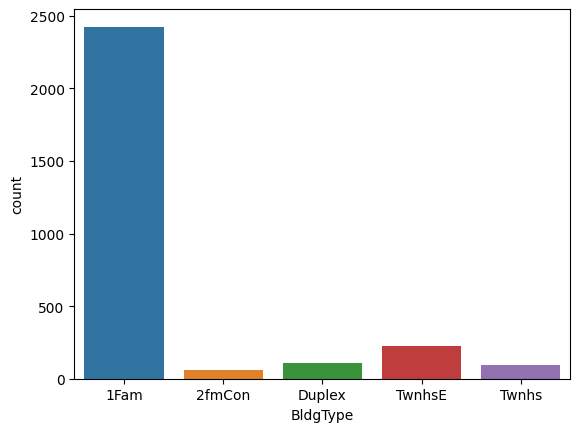

#################### HouseStyle Counts - Ratio ####################
            HouseStyle  Ratio
HouseStyle                   
1Story            1471 50.394
2Story             872 29.873
1.5Fin             314 10.757
SLvl               128  4.385
SFoyer              83  2.843
2.5Unf              24  0.822
1.5Unf              19  0.651
2.5Fin               8  0.274
#################### HouseStyle Unique Variable Counts ####################
HouseStyle : 8
#################### HouseStyle Counts - Ratio Visualizing ####################


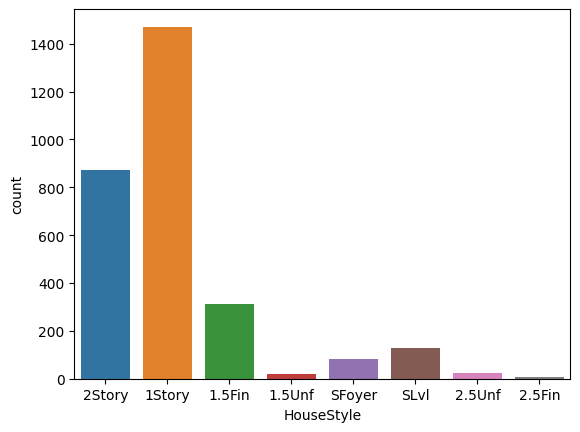

#################### RoofStyle Counts - Ratio ####################
           RoofStyle  Ratio
RoofStyle                  
Gable           2310 79.137
Hip              551 18.876
Gambrel           22  0.754
Flat              20  0.685
Mansard           11  0.377
Shed               5  0.171
#################### RoofStyle Unique Variable Counts ####################
RoofStyle : 6
#################### RoofStyle Counts - Ratio Visualizing ####################


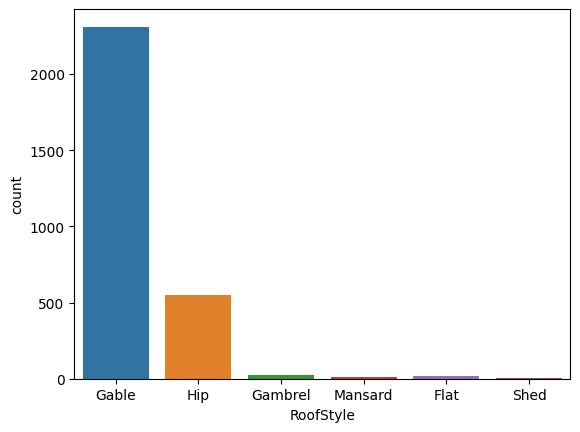

#################### RoofMatl Counts - Ratio ####################
          RoofMatl  Ratio
RoofMatl                 
CompShg       2876 98.527
Tar&Grv         23  0.788
WdShake          9  0.308
WdShngl          7  0.240
Metal            1  0.034
Membran          1  0.034
Roll             1  0.034
ClyTile          1  0.034
#################### RoofMatl Unique Variable Counts ####################
RoofMatl : 8
#################### RoofMatl Counts - Ratio Visualizing ####################


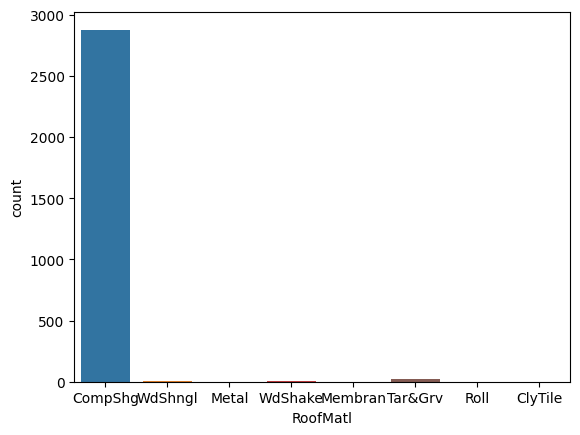

#################### Exterior1st Counts - Ratio ####################
             Exterior1st  Ratio
Exterior1st                    
VinylSd             1025 35.115
MetalSd              450 15.416
HdBoard              442 15.142
Wd Sdng              411 14.080
Plywood              221  7.571
CemntBd              126  4.317
BrkFace               87  2.980
WdShing               56  1.918
AsbShng               44  1.507
Stucco                43  1.473
BrkComm                6  0.206
AsphShn                2  0.069
Stone                  2  0.069
CBlock                 2  0.069
ImStucc                1  0.034
#################### Exterior1st Unique Variable Counts ####################
Exterior1st : 15
#################### Exterior1st Counts - Ratio Visualizing ####################


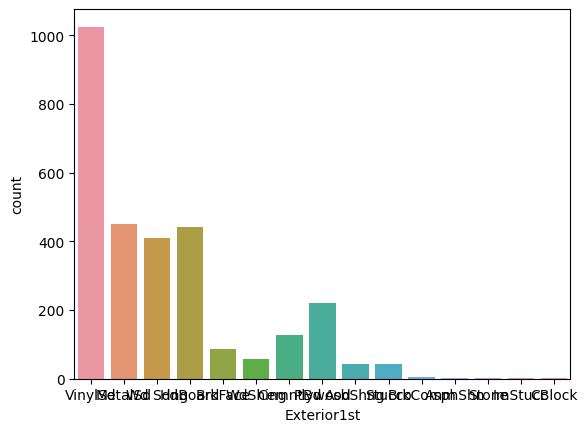

#################### Exterior2nd Counts - Ratio ####################
             Exterior2nd  Ratio
Exterior2nd                    
VinylSd             1014 34.738
MetalSd              447 15.313
HdBoard              406 13.909
Wd Sdng              391 13.395
Plywood              270  9.250
CmentBd              126  4.317
Wd Shng               81  2.775
BrkFace               47  1.610
Stucco                47  1.610
AsbShng               38  1.302
Brk Cmn               22  0.754
ImStucc               15  0.514
Stone                  6  0.206
AsphShn                4  0.137
CBlock                 3  0.103
Other                  1  0.034
#################### Exterior2nd Unique Variable Counts ####################
Exterior2nd : 16
#################### Exterior2nd Counts - Ratio Visualizing ####################


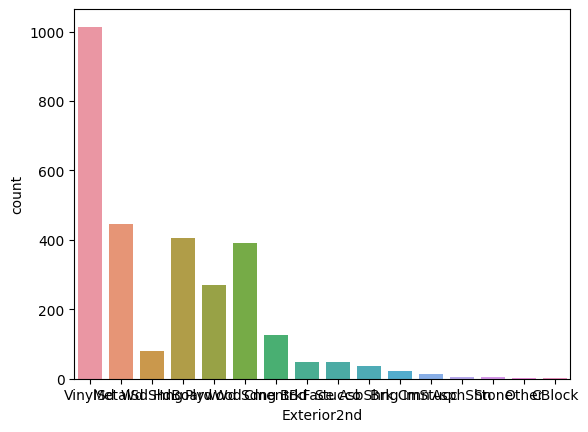

#################### MasVnrType Counts - Ratio ####################
            MasVnrType  Ratio
MasVnrType                   
BrkFace            879 30.113
Stone              249  8.530
BrkCmn              25  0.856
#################### MasVnrType Unique Variable Counts ####################
MasVnrType : 3
#################### MasVnrType Counts - Ratio Visualizing ####################


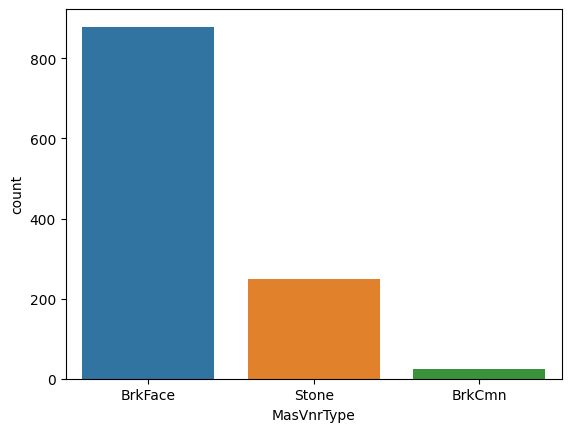

#################### ExterQual Counts - Ratio ####################
           ExterQual  Ratio
ExterQual                  
TA              1798 61.596
Gd               979 33.539
Ex               107  3.666
Fa                35  1.199
#################### ExterQual Unique Variable Counts ####################
ExterQual : 4
#################### ExterQual Counts - Ratio Visualizing ####################


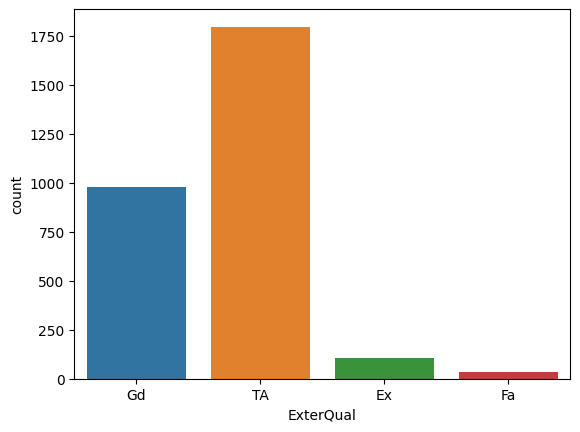

#################### ExterCond Counts - Ratio ####################
           ExterCond  Ratio
ExterCond                  
TA              2538 86.948
Gd               299 10.243
Fa                67  2.295
Ex                12  0.411
Po                 3  0.103
#################### ExterCond Unique Variable Counts ####################
ExterCond : 5
#################### ExterCond Counts - Ratio Visualizing ####################


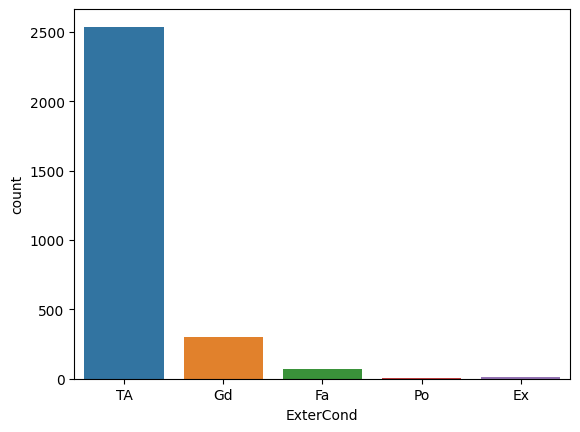

#################### Foundation Counts - Ratio ####################
            Foundation  Ratio
Foundation                   
PConc             1308 44.810
CBlock            1235 42.309
BrkTil             311 10.654
Slab                49  1.679
Stone               11  0.377
Wood                 5  0.171
#################### Foundation Unique Variable Counts ####################
Foundation : 6
#################### Foundation Counts - Ratio Visualizing ####################


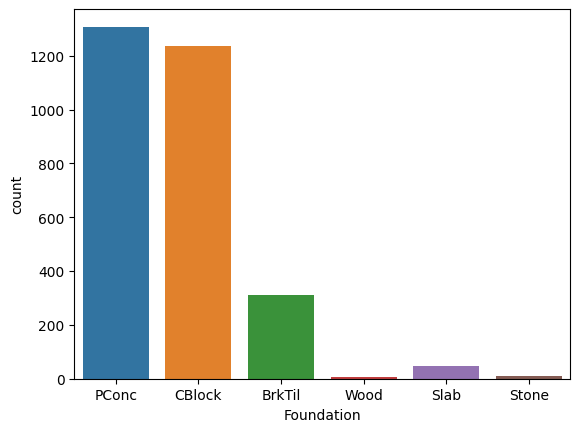

#################### BsmtQual Counts - Ratio ####################
          BsmtQual  Ratio
BsmtQual                 
TA            1283 43.953
Gd            1209 41.418
Ex             258  8.839
Fa              88  3.015
#################### BsmtQual Unique Variable Counts ####################
BsmtQual : 4
#################### BsmtQual Counts - Ratio Visualizing ####################


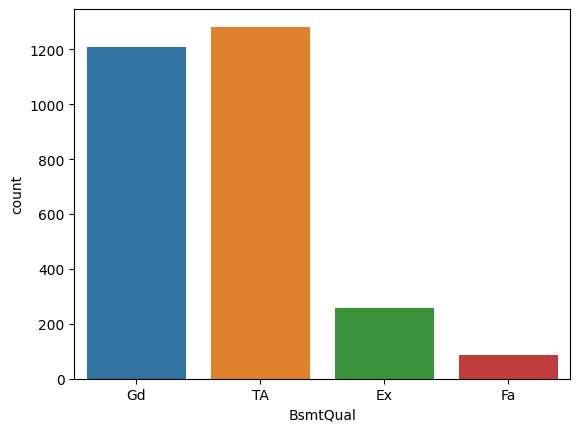

#################### BsmtCond Counts - Ratio ####################
          BsmtCond  Ratio
BsmtCond                 
TA            2606 89.277
Gd             122  4.180
Fa             104  3.563
Po               5  0.171
#################### BsmtCond Unique Variable Counts ####################
BsmtCond : 4
#################### BsmtCond Counts - Ratio Visualizing ####################


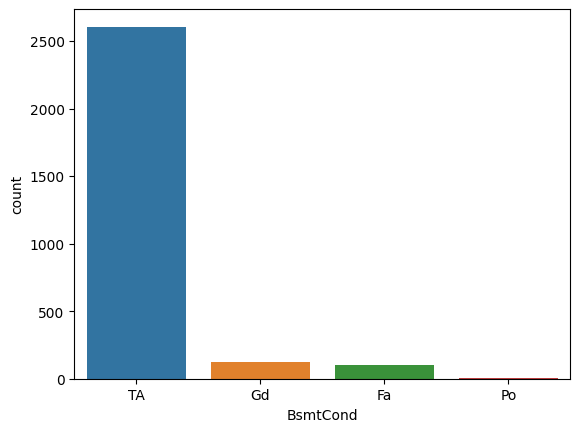

#################### BsmtExposure Counts - Ratio ####################
              BsmtExposure  Ratio
BsmtExposure                     
No                    1904 65.228
Av                     418 14.320
Gd                     276  9.455
Mn                     239  8.188
#################### BsmtExposure Unique Variable Counts ####################
BsmtExposure : 4
#################### BsmtExposure Counts - Ratio Visualizing ####################


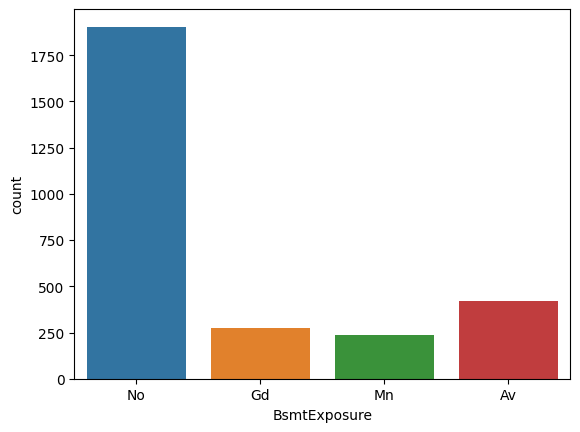

#################### BsmtFinType1 Counts - Ratio ####################
              BsmtFinType1  Ratio
BsmtFinType1                     
Unf                    851 29.154
GLQ                    849 29.085
ALQ                    429 14.697
Rec                    288  9.866
BLQ                    269  9.215
LwQ                    154  5.276
#################### BsmtFinType1 Unique Variable Counts ####################
BsmtFinType1 : 6
#################### BsmtFinType1 Counts - Ratio Visualizing ####################


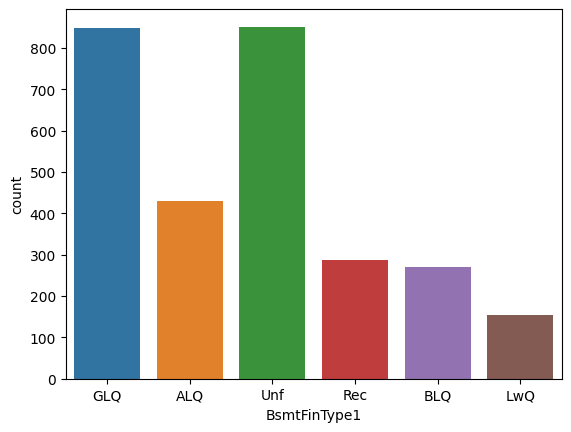

#################### BsmtFinType2 Counts - Ratio ####################
              BsmtFinType2  Ratio
BsmtFinType2                     
Unf                   2493 85.406
Rec                    105  3.597
LwQ                     87  2.980
BLQ                     68  2.330
ALQ                     52  1.781
GLQ                     34  1.165
#################### BsmtFinType2 Unique Variable Counts ####################
BsmtFinType2 : 6
#################### BsmtFinType2 Counts - Ratio Visualizing ####################


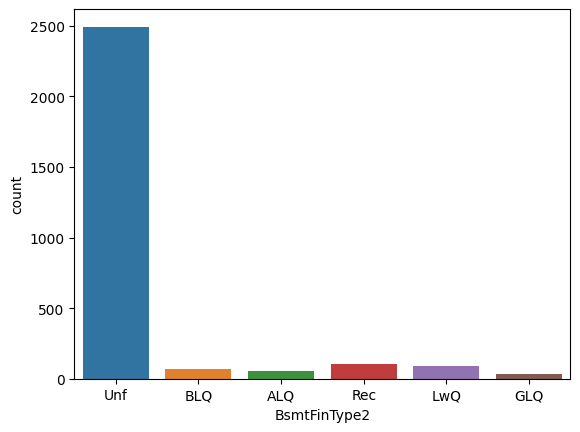

#################### Heating Counts - Ratio ####################
         Heating  Ratio
Heating                
GasA        2874 98.458
GasW          27  0.925
Grav           9  0.308
Wall           6  0.206
OthW           2  0.069
Floor          1  0.034
#################### Heating Unique Variable Counts ####################
Heating : 6
#################### Heating Counts - Ratio Visualizing ####################


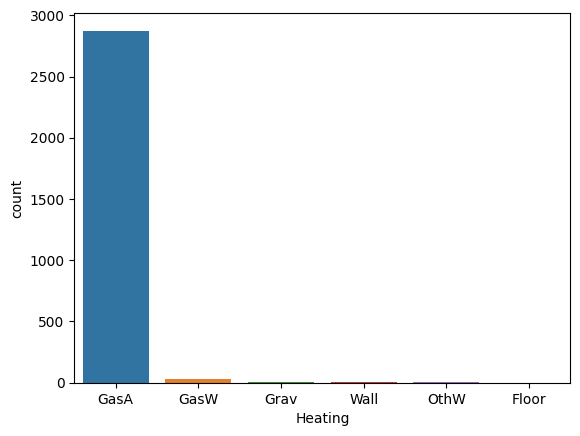

#################### HeatingQC Counts - Ratio ####################
           HeatingQC  Ratio
HeatingQC                  
Ex              1493 51.148
TA               857 29.359
Gd               474 16.238
Fa                92  3.152
Po                 3  0.103
#################### HeatingQC Unique Variable Counts ####################
HeatingQC : 5
#################### HeatingQC Counts - Ratio Visualizing ####################


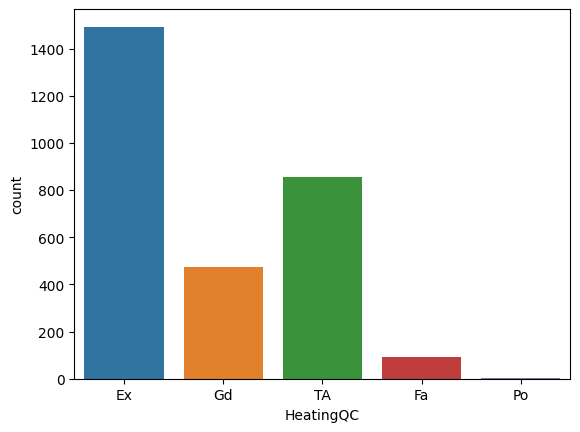

#################### CentralAir Counts - Ratio ####################
            CentralAir  Ratio
CentralAir                   
Y                 2723 93.285
N                  196  6.715
#################### CentralAir Unique Variable Counts ####################
CentralAir : 2
#################### CentralAir Counts - Ratio Visualizing ####################


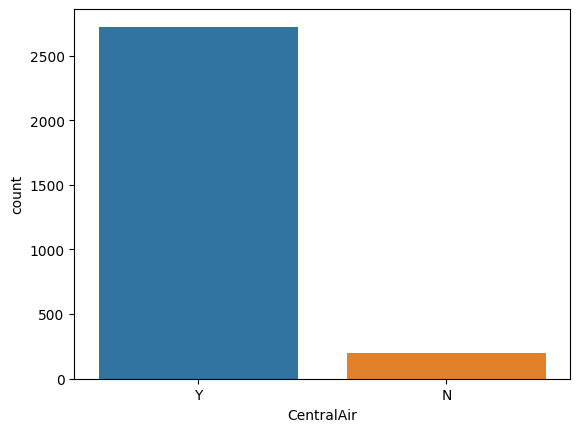

#################### Electrical Counts - Ratio ####################
            Electrical  Ratio
Electrical                   
SBrkr             2671 91.504
FuseA              188  6.441
FuseF               50  1.713
FuseP                8  0.274
Mix                  1  0.034
#################### Electrical Unique Variable Counts ####################
Electrical : 5
#################### Electrical Counts - Ratio Visualizing ####################


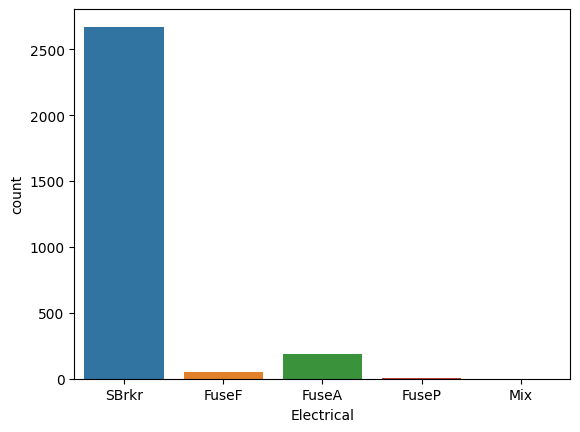

#################### KitchenQual Counts - Ratio ####################
             KitchenQual  Ratio
KitchenQual                    
TA                  1492 51.113
Gd                  1151 39.431
Ex                   205  7.023
Fa                    70  2.398
#################### KitchenQual Unique Variable Counts ####################
KitchenQual : 4
#################### KitchenQual Counts - Ratio Visualizing ####################


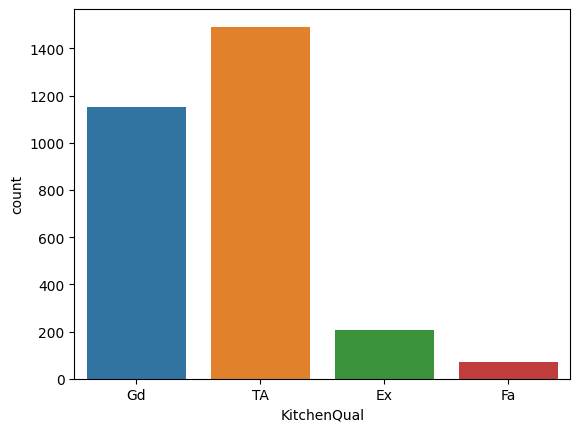

#################### Functional Counts - Ratio ####################
            Functional  Ratio
Functional                   
Typ               2717 93.080
Min2                70  2.398
Min1                65  2.227
Mod                 35  1.199
Maj1                19  0.651
Maj2                 9  0.308
Sev                  2  0.069
#################### Functional Unique Variable Counts ####################
Functional : 7
#################### Functional Counts - Ratio Visualizing ####################


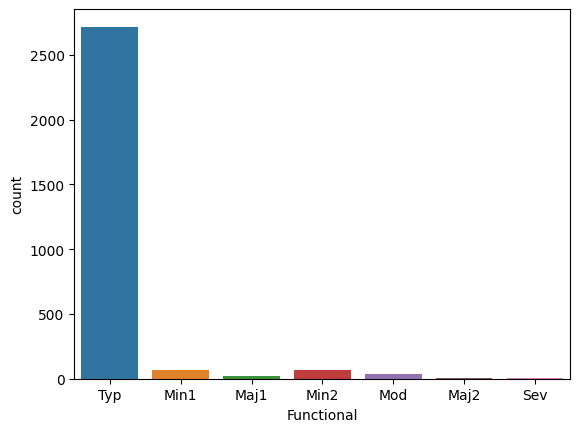

#################### FireplaceQu Counts - Ratio ####################
             FireplaceQu  Ratio
FireplaceQu                    
Gd                   744 25.488
TA                   592 20.281
Fa                    74  2.535
Po                    46  1.576
Ex                    43  1.473
#################### FireplaceQu Unique Variable Counts ####################
FireplaceQu : 5
#################### FireplaceQu Counts - Ratio Visualizing ####################


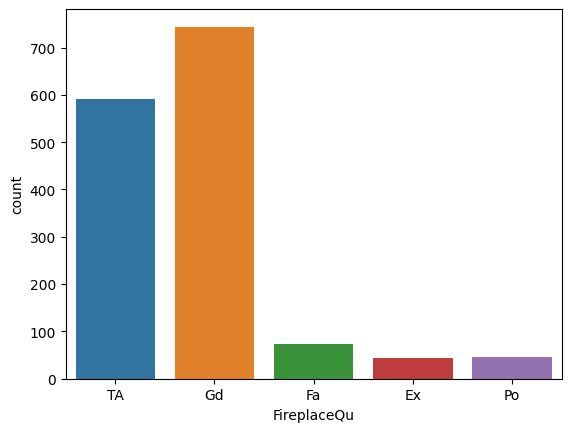

#################### GarageType Counts - Ratio ####################
            GarageType  Ratio
GarageType                   
Attchd            1723 59.027
Detchd             779 26.687
BuiltIn            186  6.372
Basment             36  1.233
2Types              23  0.788
CarPort             15  0.514
#################### GarageType Unique Variable Counts ####################
GarageType : 6
#################### GarageType Counts - Ratio Visualizing ####################


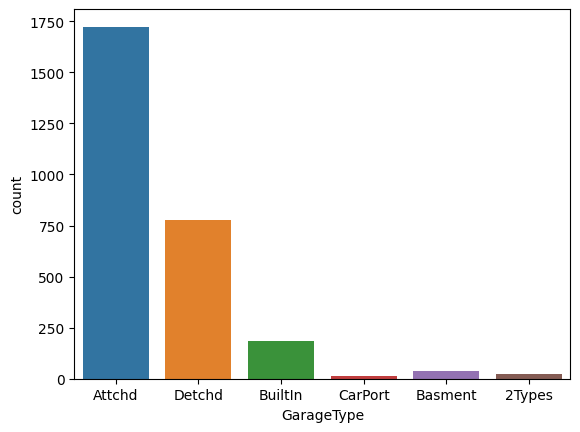

#################### GarageFinish Counts - Ratio ####################
              GarageFinish  Ratio
GarageFinish                     
Unf                   1230 42.138
RFn                    811 27.783
Fin                    719 24.632
#################### GarageFinish Unique Variable Counts ####################
GarageFinish : 3
#################### GarageFinish Counts - Ratio Visualizing ####################


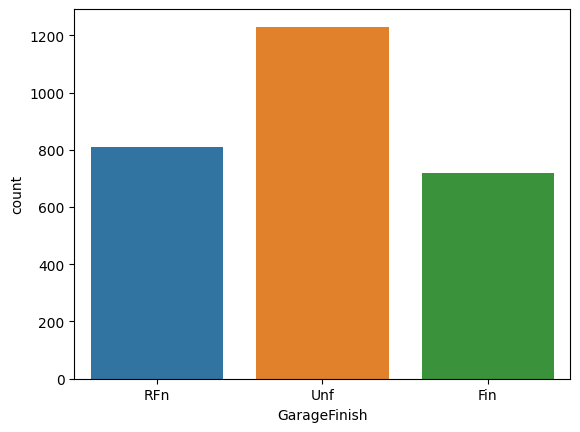

#################### GarageQual Counts - Ratio ####################
            GarageQual  Ratio
GarageQual                   
TA                2604 89.209
Fa                 124  4.248
Gd                  24  0.822
Po                   5  0.171
Ex                   3  0.103
#################### GarageQual Unique Variable Counts ####################
GarageQual : 5
#################### GarageQual Counts - Ratio Visualizing ####################


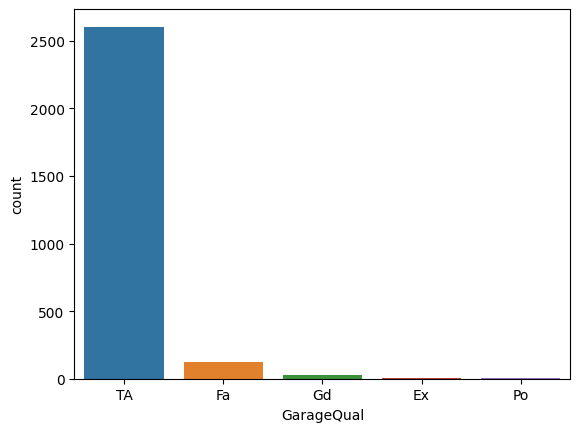

#################### GarageCond Counts - Ratio ####################
            GarageCond  Ratio
GarageCond                   
TA                2654 90.922
Fa                  74  2.535
Gd                  15  0.514
Po                  14  0.480
Ex                   3  0.103
#################### GarageCond Unique Variable Counts ####################
GarageCond : 5
#################### GarageCond Counts - Ratio Visualizing ####################


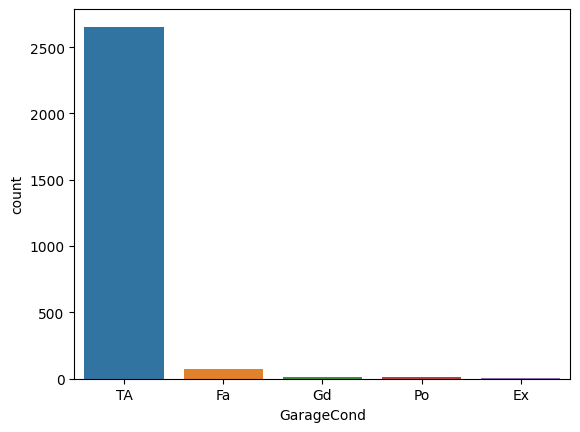

#################### PavedDrive Counts - Ratio ####################
            PavedDrive  Ratio
PavedDrive                   
Y                 2641 90.476
N                  216  7.400
P                   62  2.124
#################### PavedDrive Unique Variable Counts ####################
PavedDrive : 3
#################### PavedDrive Counts - Ratio Visualizing ####################


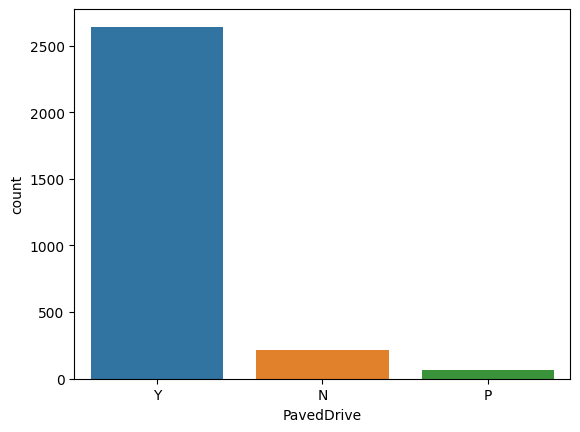

#################### PoolQC Counts - Ratio ####################
        PoolQC  Ratio
PoolQC               
Ex           4  0.137
Gd           4  0.137
Fa           2  0.069
#################### PoolQC Unique Variable Counts ####################
PoolQC : 3
#################### PoolQC Counts - Ratio Visualizing ####################


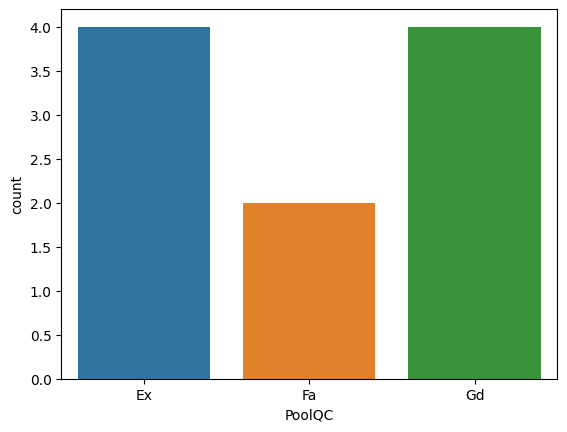

#################### Fence Counts - Ratio ####################
       Fence  Ratio
Fence              
MnPrv    329 11.271
GdPrv    118  4.042
GdWo     112  3.837
MnWw      12  0.411
#################### Fence Unique Variable Counts ####################
Fence : 4
#################### Fence Counts - Ratio Visualizing ####################


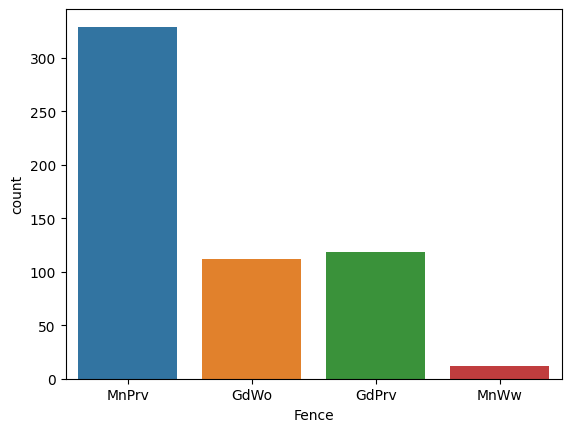

#################### MiscFeature Counts - Ratio ####################
             MiscFeature  Ratio
MiscFeature                    
Shed                  95  3.255
Gar2                   5  0.171
Othr                   4  0.137
TenC                   1  0.034
#################### MiscFeature Unique Variable Counts ####################
MiscFeature : 4
#################### MiscFeature Counts - Ratio Visualizing ####################


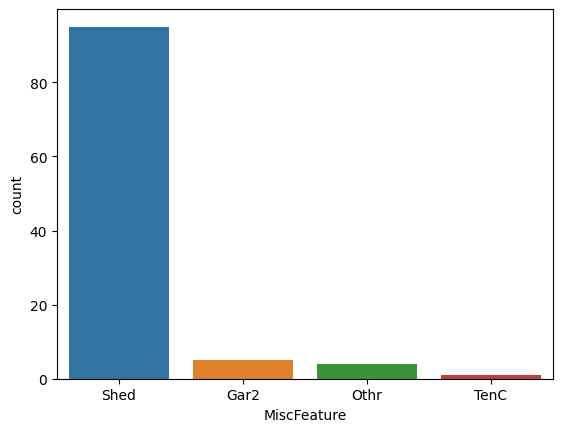

#################### SaleType Counts - Ratio ####################
          SaleType  Ratio
SaleType                 
WD            2525 86.502
New            239  8.188
COD             87  2.980
ConLD           26  0.891
CWD             12  0.411
ConLI            9  0.308
ConLw            8  0.274
Oth              7  0.240
Con              5  0.171
#################### SaleType Unique Variable Counts ####################
SaleType : 9
#################### SaleType Counts - Ratio Visualizing ####################


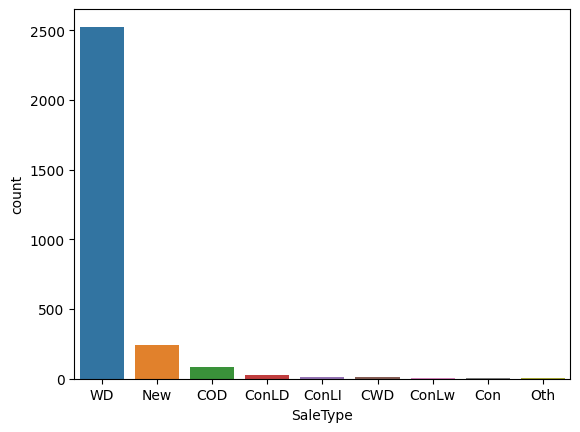

#################### SaleCondition Counts - Ratio ####################
               SaleCondition  Ratio
SaleCondition                      
Normal                  2402 82.288
Partial                  245  8.393
Abnorml                  190  6.509
Family                    46  1.576
Alloca                    24  0.822
AdjLand                   12  0.411
#################### SaleCondition Unique Variable Counts ####################
SaleCondition : 6
#################### SaleCondition Counts - Ratio Visualizing ####################


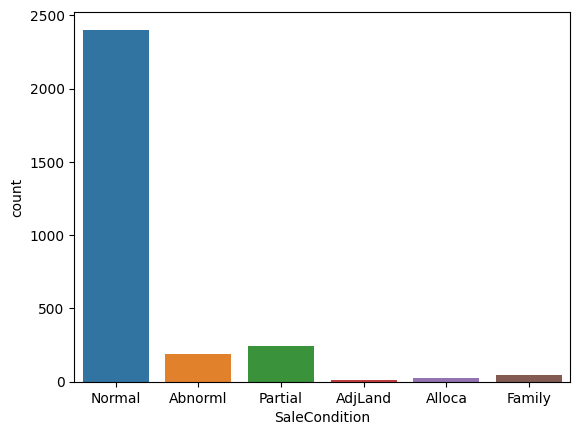

#################### OverallCond Counts - Ratio ####################
             OverallCond  Ratio
OverallCond                    
5                   1645 56.355
6                    531 18.191
7                    390 13.361
8                    144  4.933
4                    101  3.460
3                     50  1.713
9                     41  1.405
2                     10  0.343
1                      7  0.240
#################### OverallCond Unique Variable Counts ####################
OverallCond : 9
#################### OverallCond Counts - Ratio Visualizing ####################


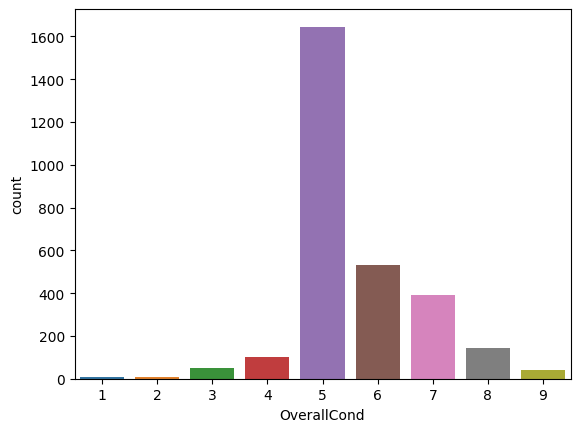

#################### BsmtFullBath Counts - Ratio ####################
              BsmtFullBath  Ratio
BsmtFullBath                     
0.000                 1705 58.410
1.000                 1172 40.151
2.000                   38  1.302
3.000                    2  0.069
#################### BsmtFullBath Unique Variable Counts ####################
BsmtFullBath : 4
#################### BsmtFullBath Counts - Ratio Visualizing ####################


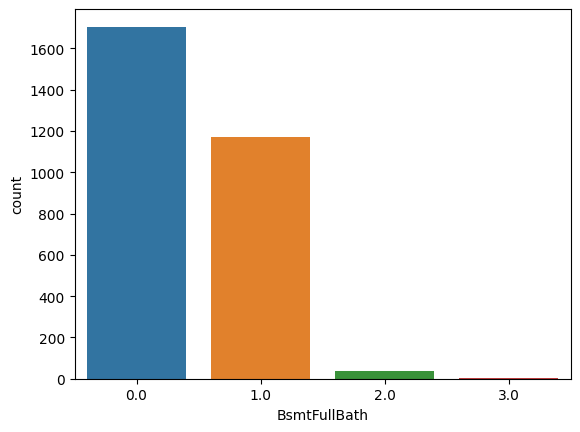

#################### BsmtHalfBath Counts - Ratio ####################
              BsmtHalfBath  Ratio
BsmtHalfBath                     
0.000                 2742 93.936
1.000                  171  5.858
2.000                    4  0.137
#################### BsmtHalfBath Unique Variable Counts ####################
BsmtHalfBath : 3
#################### BsmtHalfBath Counts - Ratio Visualizing ####################


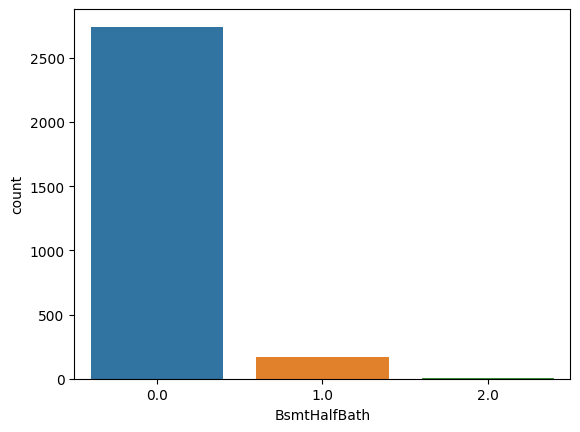

#################### FullBath Counts - Ratio ####################
          FullBath  Ratio
FullBath                 
2             1530 52.415
1             1309 44.844
3               64  2.193
0               12  0.411
4                4  0.137
#################### FullBath Unique Variable Counts ####################
FullBath : 5
#################### FullBath Counts - Ratio Visualizing ####################


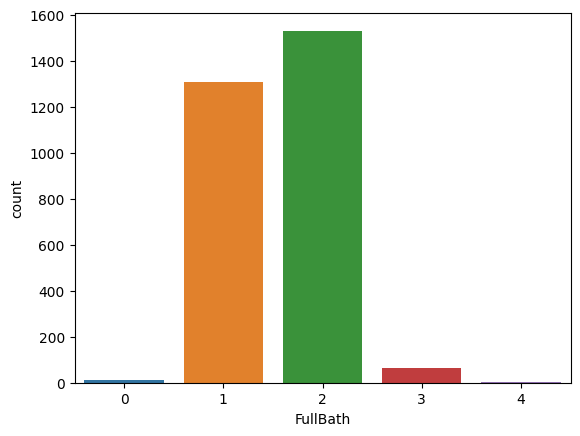

#################### HalfBath Counts - Ratio ####################
          HalfBath  Ratio
HalfBath                 
0             1834 62.830
1             1060 36.314
2               25  0.856
#################### HalfBath Unique Variable Counts ####################
HalfBath : 3
#################### HalfBath Counts - Ratio Visualizing ####################


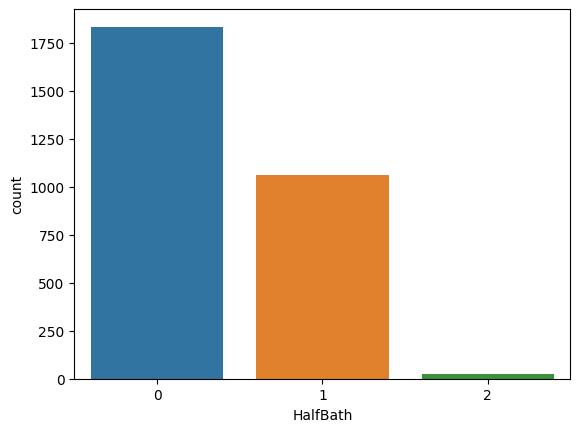

#################### BedroomAbvGr Counts - Ratio ####################
              BedroomAbvGr  Ratio
BedroomAbvGr                     
3                     1596 54.676
2                      742 25.420
4                      400 13.703
1                      103  3.529
5                       48  1.644
6                       21  0.719
0                        8  0.274
8                        1  0.034
#################### BedroomAbvGr Unique Variable Counts ####################
BedroomAbvGr : 8
#################### BedroomAbvGr Counts - Ratio Visualizing ####################


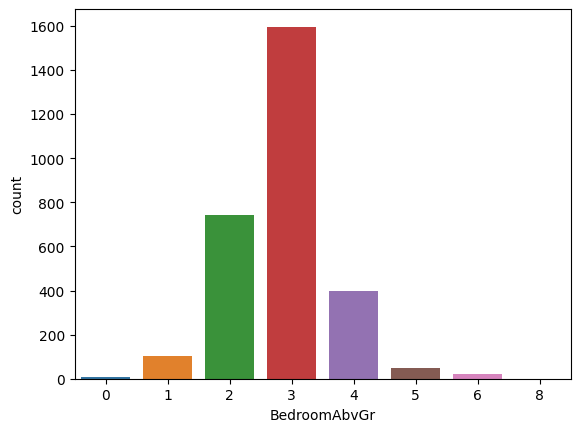

#################### KitchenAbvGr Counts - Ratio ####################
              KitchenAbvGr  Ratio
KitchenAbvGr                     
1                     2785 95.409
2                      129  4.419
0                        3  0.103
3                        2  0.069
#################### KitchenAbvGr Unique Variable Counts ####################
KitchenAbvGr : 4
#################### KitchenAbvGr Counts - Ratio Visualizing ####################


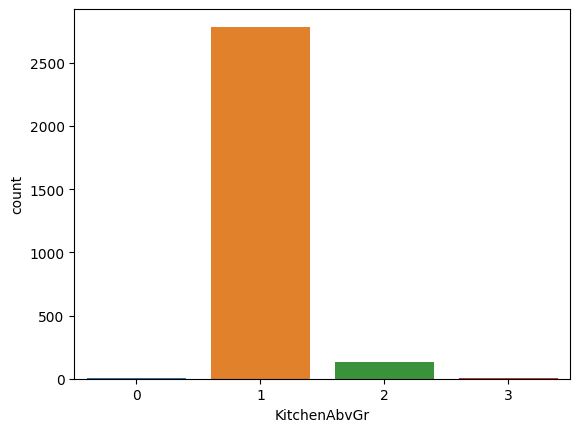

#################### Fireplaces Counts - Ratio ####################
            Fireplaces  Ratio
Fireplaces                   
0                 1420 48.647
1                 1268 43.440
2                  219  7.503
3                   11  0.377
4                    1  0.034
#################### Fireplaces Unique Variable Counts ####################
Fireplaces : 5
#################### Fireplaces Counts - Ratio Visualizing ####################


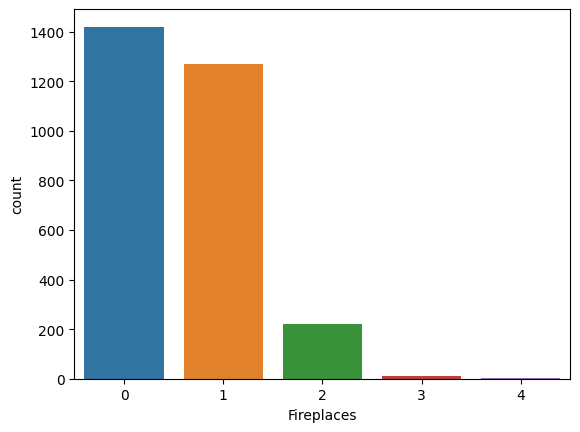

#################### GarageCars Counts - Ratio ####################
            GarageCars  Ratio
GarageCars                   
2.000             1594 54.608
1.000              776 26.584
3.000              374 12.813
0.000              157  5.379
4.000               16  0.548
5.000                1  0.034
#################### GarageCars Unique Variable Counts ####################
GarageCars : 6
#################### GarageCars Counts - Ratio Visualizing ####################


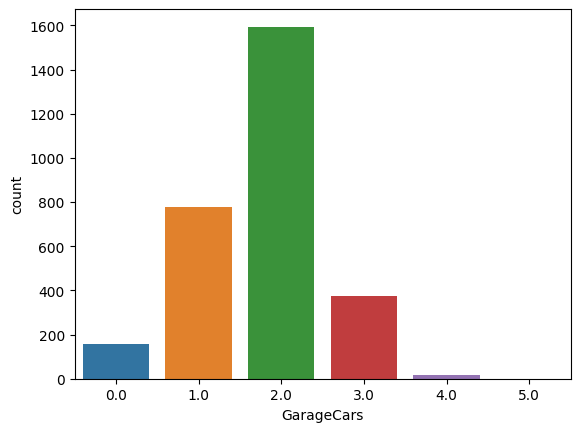

#################### Neighborhood Counts - Ratio ####################
              Neighborhood  Ratio
Neighborhood                     
NAmes                  443 15.176
CollgCr                267  9.147
OldTown                239  8.188
Edwards                194  6.646
Somerst                182  6.235
NridgHt                166  5.687
Gilbert                165  5.653
Sawyer                 151  5.173
NWAmes                 131  4.488
SawyerW                125  4.282
Mitchel                114  3.905
BrkSide                108  3.700
Crawfor                103  3.529
IDOTRR                  93  3.186
Timber                  72  2.467
NoRidge                 71  2.432
StoneBr                 51  1.747
SWISU                   48  1.644
ClearCr                 44  1.507
MeadowV                 37  1.268
BrDale                  30  1.028
Blmngtn                 28  0.959
Veenker                 24  0.822
NPkVill                 23  0.788
Blueste                 10  0.343
############

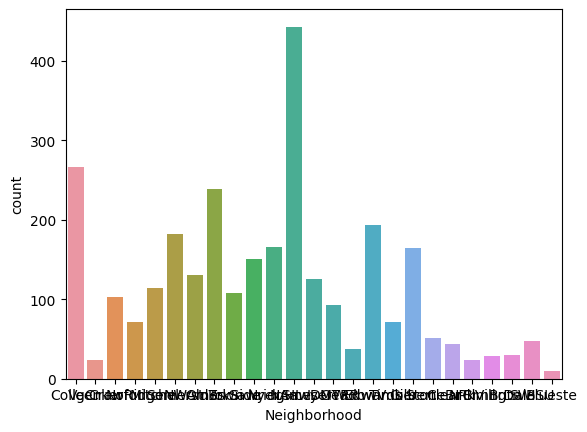

#################### MSSubClass Counts - Ratio ####################
            MSSubClass  Ratio
MSSubClass                   
20                1079 36.965
60                 575 19.699
50                 287  9.832
120                182  6.235
30                 139  4.762
70                 128  4.385
160                128  4.385
80                 118  4.042
90                 109  3.734
190                 61  2.090
85                  48  1.644
75                  23  0.788
45                  18  0.617
180                 17  0.582
40                   6  0.206
150                  1  0.034
#################### MSSubClass Unique Variable Counts ####################
MSSubClass : 16
#################### MSSubClass Counts - Ratio Visualizing ####################


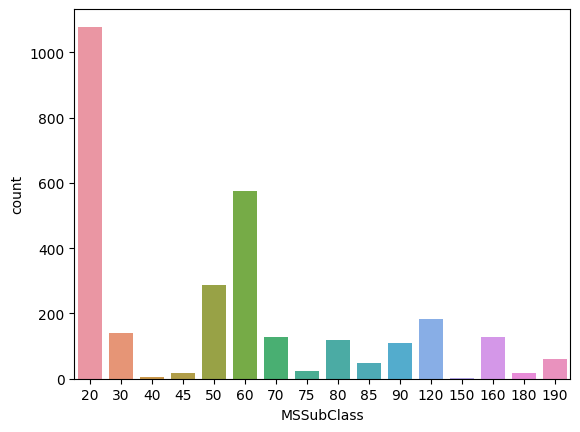

#################### OverallQual Counts - Ratio ####################
             OverallQual  Ratio
OverallQual                    
5                    825 28.263
6                    731 25.043
7                    600 20.555
8                    342 11.716
4                    226  7.742
9                    107  3.666
3                     40  1.370
10                    31  1.062
2                     13  0.445
1                      4  0.137
#################### OverallQual Unique Variable Counts ####################
OverallQual : 10
#################### OverallQual Counts - Ratio Visualizing ####################


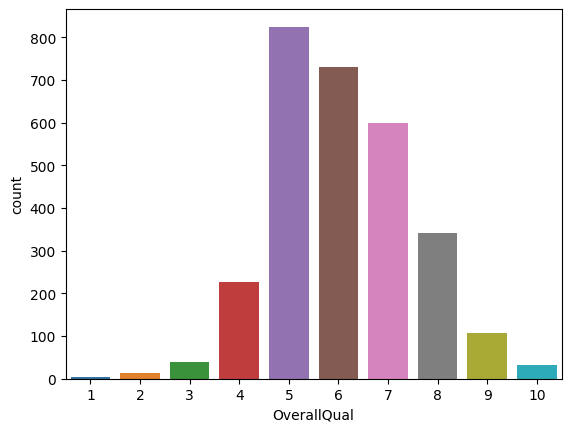

In [30]:
# applying the function:
for col in cat_cols:
    cat_summary(df,col,plot=True)

<a id = "6"></a>
### 4.2 Analysis of Numerical Variables

In [31]:
# defining a function to check summary of the numerical variables:

def num_summary(dataframe,col_name,plot = False, quantiles = [0.05, 0.10, 0.20, 0.50, 0.60, 0.80, 0.90, 0.95, 0.99]):
    if plot:
        dataframe[col_name].hist(bins=20)
        plt.xlabel(col_name)
        plt.title(col_name)
        plt.show(block = True)
    print("#################### QUANTILES ###############")
    print(dataframe[col_name].describe(quantiles).T, end= "\n\n")

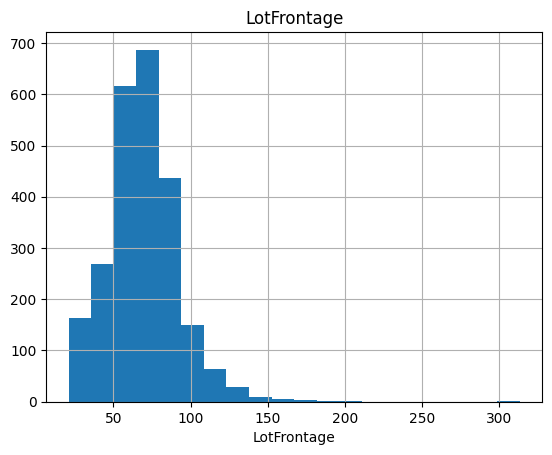

#################### QUANTILES ###############
count   2433.000
mean      69.306
std       23.345
min       21.000
5%        32.000
10%       43.000
20%       53.000
50%       68.000
60%       73.000
80%       84.000
90%       95.000
95%      107.000
99%      135.680
max      313.000
Name: LotFrontage, dtype: float64



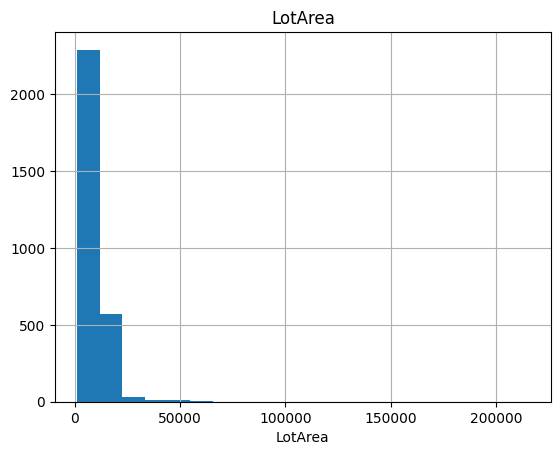

#################### QUANTILES ###############
count     2919.000
mean     10168.114
std       7886.996
min       1300.000
5%        3182.000
10%       4922.400
20%       7007.600
50%       9453.000
60%      10151.600
80%      12203.800
90%      14300.600
95%      17142.900
99%      33038.640
max     215245.000
Name: LotArea, dtype: float64



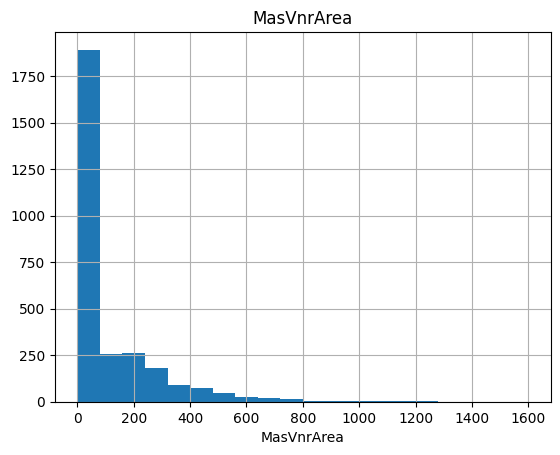

#################### QUANTILES ###############
count   2896.000
mean     102.201
std      179.334
min        0.000
5%         0.000
10%        0.000
20%        0.000
50%        0.000
60%        0.000
80%      202.000
90%      325.500
95%      466.500
99%      771.050
max     1600.000
Name: MasVnrArea, dtype: float64



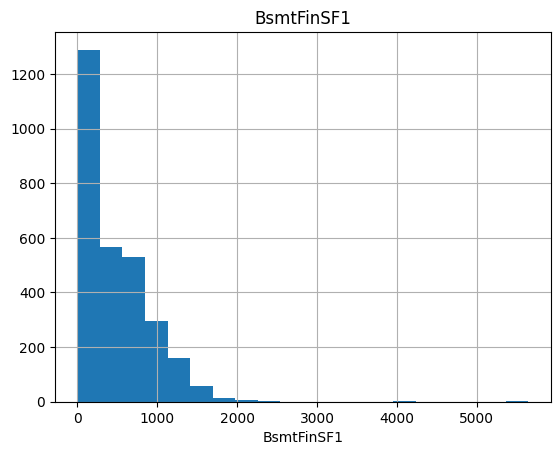

#################### QUANTILES ###############
count   2918.000
mean     441.423
std      455.611
min        0.000
5%         0.000
10%        0.000
20%        0.000
50%      368.500
60%      515.200
80%      812.000
90%     1056.900
95%     1274.000
99%     1635.320
max     5644.000
Name: BsmtFinSF1, dtype: float64



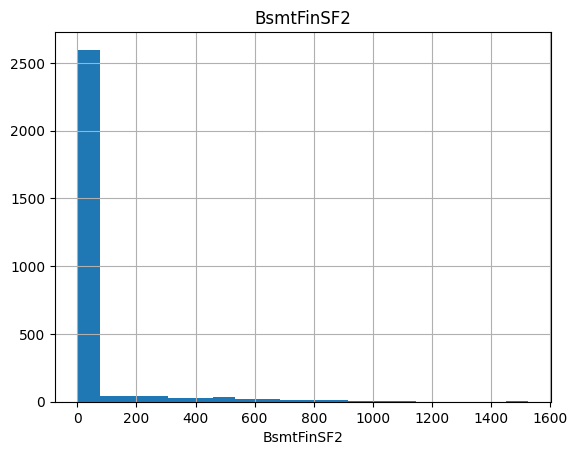

#################### QUANTILES ###############
count   2918.000
mean      49.582
std      169.206
min        0.000
5%         0.000
10%        0.000
20%        0.000
50%        0.000
60%        0.000
80%        0.000
90%      125.600
95%      435.000
99%      874.660
max     1526.000
Name: BsmtFinSF2, dtype: float64



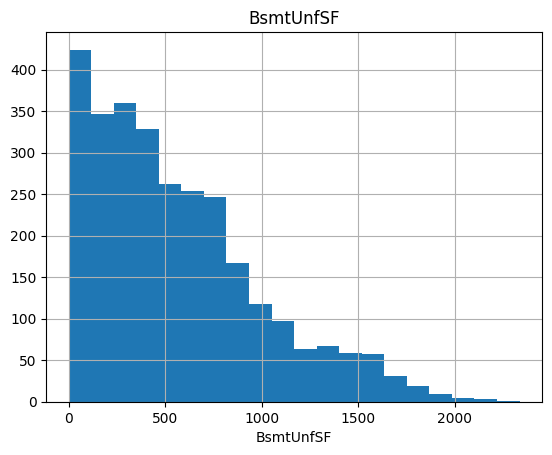

#################### QUANTILES ###############
count   2918.000
mean     560.772
std      439.544
min        0.000
5%         0.000
10%       56.000
20%      174.000
50%      467.000
60%      595.000
80%      892.600
90%     1212.600
95%     1474.900
99%     1776.490
max     2336.000
Name: BsmtUnfSF, dtype: float64



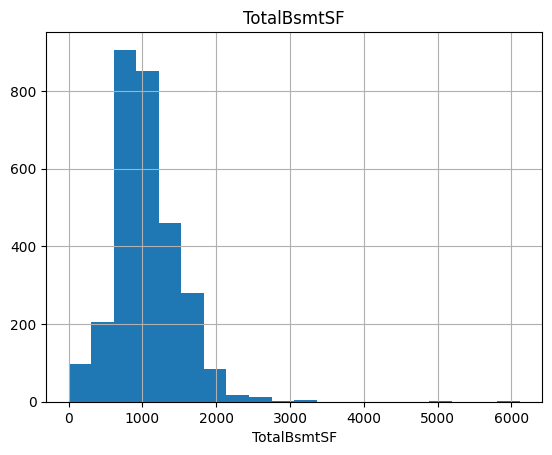

#################### QUANTILES ###############
count   2918.000
mean    1051.778
std      440.766
min        0.000
5%       455.250
10%      600.000
20%      741.000
50%      989.500
60%     1089.200
80%     1392.000
90%     1614.000
95%     1776.150
99%     2198.300
max     6110.000
Name: TotalBsmtSF, dtype: float64



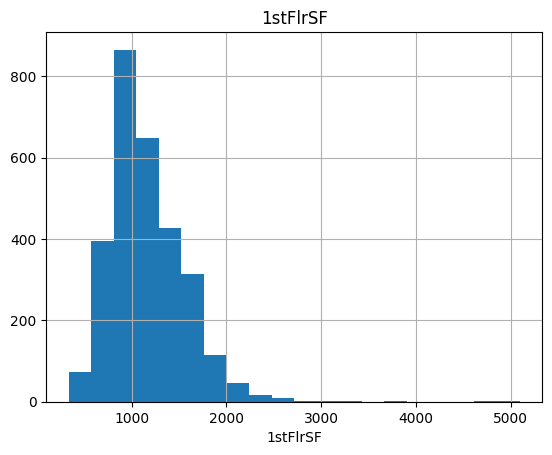

#################### QUANTILES ###############
count   2919.000
mean    1159.582
std      392.362
min      334.000
5%       665.900
10%      744.800
20%      847.000
50%     1082.000
60%     1180.000
80%     1483.400
90%     1675.000
95%     1830.100
99%     2288.020
max     5095.000
Name: 1stFlrSF, dtype: float64



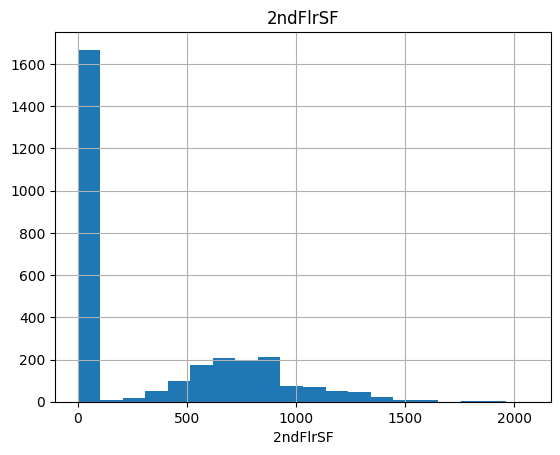

#################### QUANTILES ###############
count   2919.000
mean     336.484
std      428.701
min        0.000
5%         0.000
10%        0.000
20%        0.000
50%        0.000
60%      427.400
80%      770.800
90%      925.000
95%     1131.200
99%     1400.200
max     2065.000
Name: 2ndFlrSF, dtype: float64



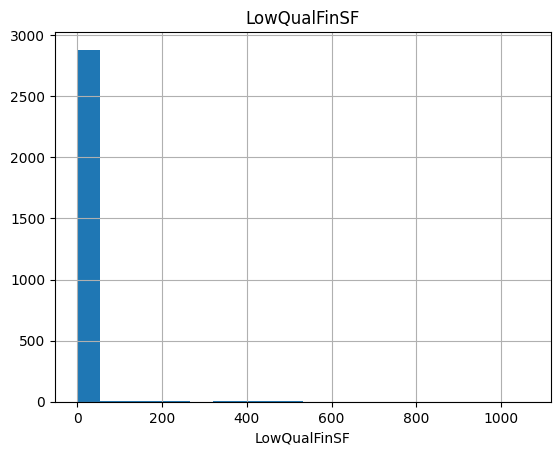

#################### QUANTILES ###############
count   2919.000
mean       4.694
std       46.397
min        0.000
5%         0.000
10%        0.000
20%        0.000
50%        0.000
60%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      153.840
max     1064.000
Name: LowQualFinSF, dtype: float64



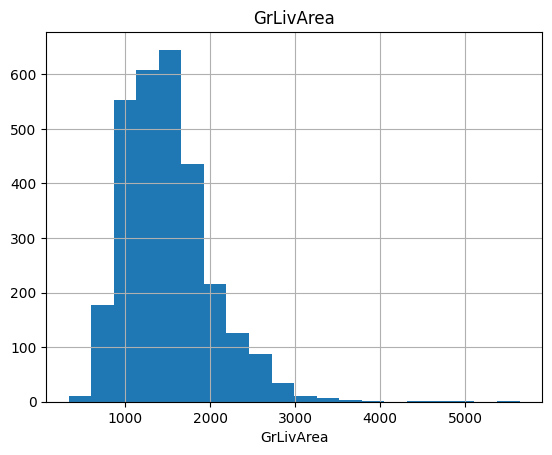

#################### QUANTILES ###############
count   2919.000
mean    1500.760
std      506.051
min      334.000
5%       861.000
10%      923.800
20%     1064.600
50%     1444.000
60%     1560.000
80%     1838.400
90%     2153.200
95%     2464.200
99%     2935.720
max     5642.000
Name: GrLivArea, dtype: float64



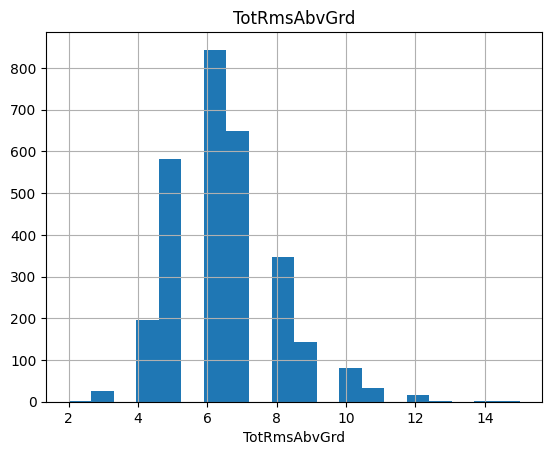

#################### QUANTILES ###############
count   2919.000
mean       6.452
std        1.569
min        2.000
5%         4.000
10%        5.000
20%        5.000
50%        6.000
60%        7.000
80%        8.000
90%        8.000
95%        9.000
99%       11.000
max       15.000
Name: TotRmsAbvGrd, dtype: float64



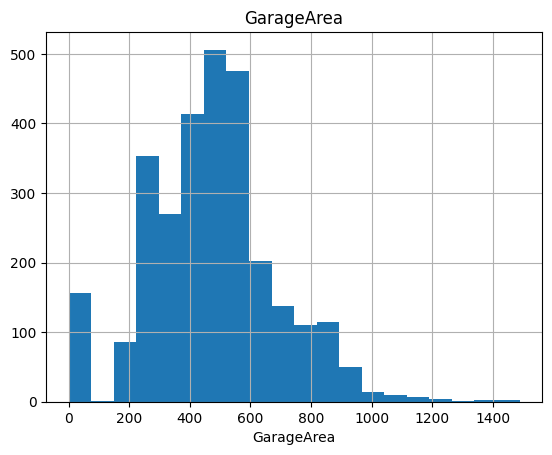

#################### QUANTILES ###############
count   2918.000
mean     472.875
std      215.395
min        0.000
5%         0.000
10%      240.000
20%      296.000
50%      480.000
60%      513.000
80%      621.000
90%      758.000
95%      856.150
99%     1019.490
max     1488.000
Name: GarageArea, dtype: float64



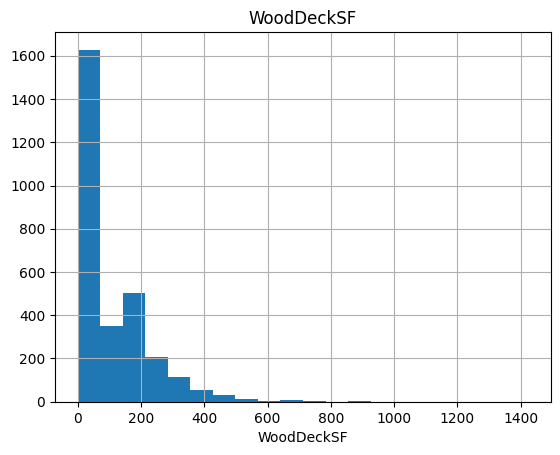

#################### QUANTILES ###############
count   2919.000
mean      93.710
std      126.527
min        0.000
5%         0.000
10%        0.000
20%        0.000
50%        0.000
60%      100.000
80%      192.000
90%      257.000
95%      328.000
99%      500.820
max     1424.000
Name: WoodDeckSF, dtype: float64



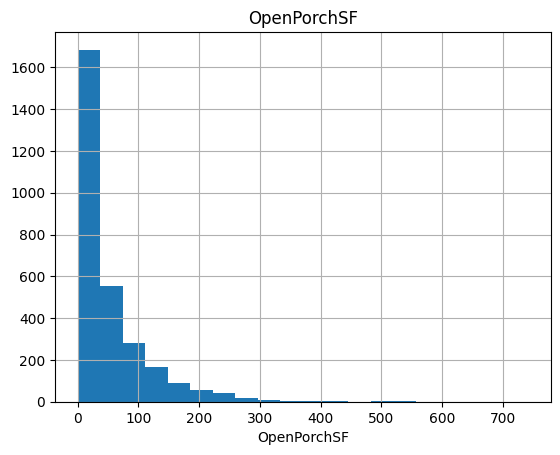

#################### QUANTILES ###############
count   2919.000
mean      47.487
std       67.575
min        0.000
5%         0.000
10%        0.000
20%        0.000
50%       26.000
60%       40.000
80%       85.000
90%      131.200
95%      183.100
99%      284.460
max      742.000
Name: OpenPorchSF, dtype: float64



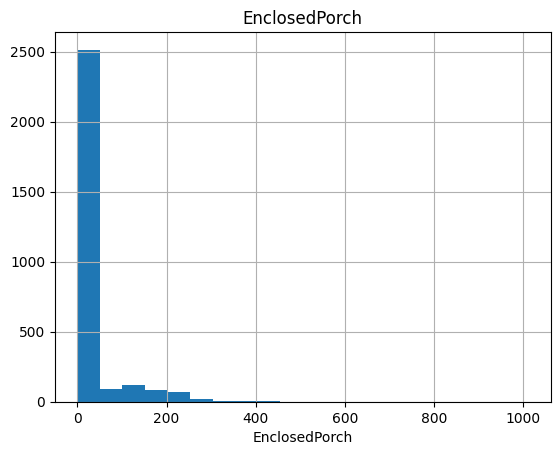

#################### QUANTILES ###############
count   2919.000
mean      23.098
std       64.244
min        0.000
5%         0.000
10%        0.000
20%        0.000
50%        0.000
60%        0.000
80%        0.000
90%      112.000
95%      176.000
99%      264.000
max     1012.000
Name: EnclosedPorch, dtype: float64



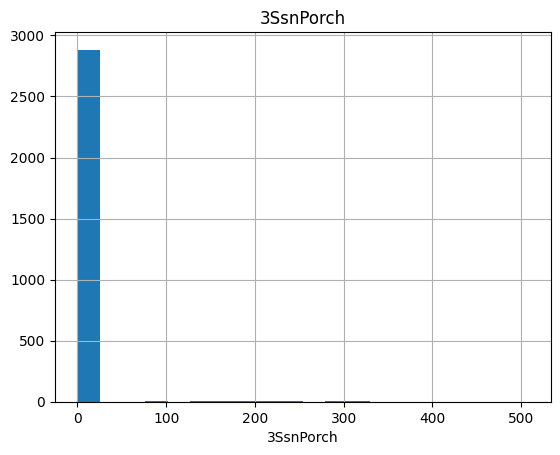

#################### QUANTILES ###############
count   2919.000
mean       2.602
std       25.188
min        0.000
5%         0.000
10%        0.000
20%        0.000
50%        0.000
60%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      144.000
max      508.000
Name: 3SsnPorch, dtype: float64



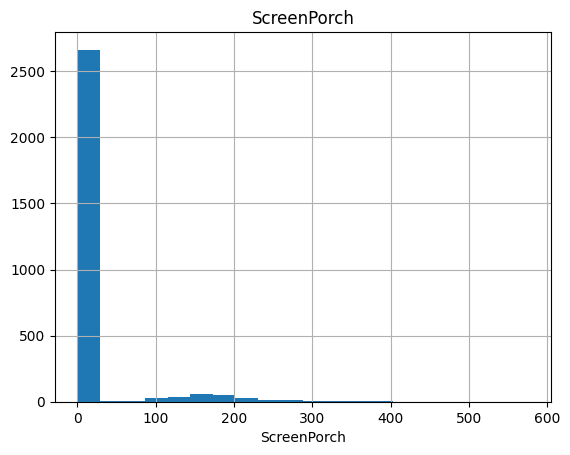

#################### QUANTILES ###############
count   2919.000
mean      16.062
std       56.184
min        0.000
5%         0.000
10%        0.000
20%        0.000
50%        0.000
60%        0.000
80%        0.000
90%        0.000
95%      161.000
99%      259.820
max      576.000
Name: ScreenPorch, dtype: float64



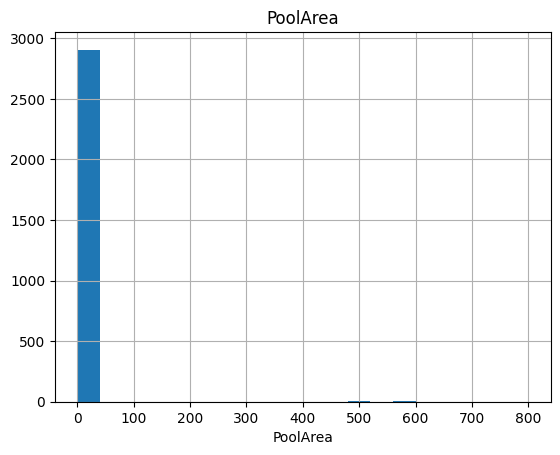

#################### QUANTILES ###############
count   2919.000
mean       2.252
std       35.664
min        0.000
5%         0.000
10%        0.000
20%        0.000
50%        0.000
60%        0.000
80%        0.000
90%        0.000
95%        0.000
99%        0.000
max      800.000
Name: PoolArea, dtype: float64



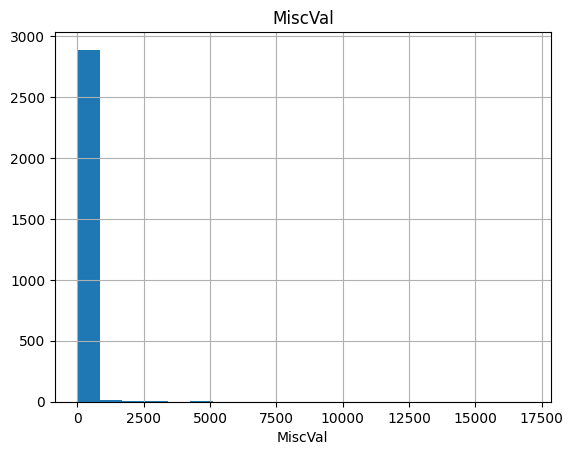

#################### QUANTILES ###############
count    2919.000
mean       50.826
std       567.402
min         0.000
5%          0.000
10%         0.000
20%         0.000
50%         0.000
60%         0.000
80%         0.000
90%         0.000
95%         0.000
99%       982.000
max     17000.000
Name: MiscVal, dtype: float64



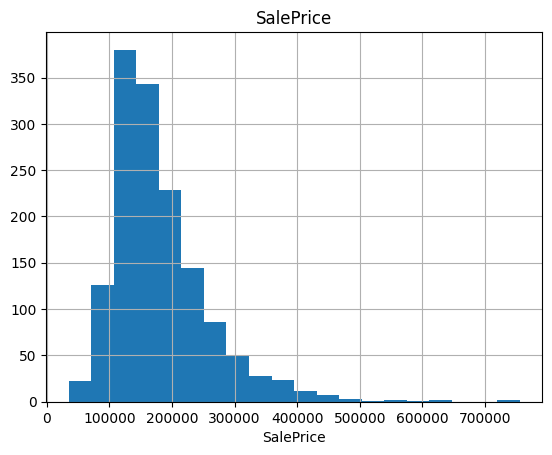

#################### QUANTILES ###############
count     1460.000
mean    180921.196
std      79442.503
min      34900.000
5%       88000.000
10%     106475.000
20%     124000.000
50%     163000.000
60%     179280.000
80%     230000.000
90%     278000.000
95%     326100.000
99%     442567.010
max     755000.000
Name: SalePrice, dtype: float64



In [32]:
# applying the function:
for col in num_cols:
    num_summary(df, col , plot = True)

<a id = "7"></a>
### 4.3 Target Variable Analysis

In [33]:
# Target - Categorical Variables

In [34]:
# defining a function to check summary of the target and categorical variables:

def target_summary_with_cat(dataframe,target,categorical_col):
    for col in categorical_col:
        print(f"################ Target Mean by {col} #################", end ="\n\n")
        print(pd.DataFrame({f"{target}_Mean": dataframe.groupby(col)[target].mean()}), end = "\n\n\n")

In [35]:
# applying the function:

target_summary_with_cat(df, "SalePrice", cat_cols)

################ Target Mean by MSZoning #################

          SalePrice_Mean
MSZoning                
C (all)        74528.000
FV            214014.062
RH            131558.375
RL            191004.995
RM            126316.830


################ Target Mean by Street #################

        SalePrice_Mean
Street                
Grvl        130190.500
Pave        181130.539


################ Target Mean by Alley #################

       SalePrice_Mean
Alley                
Grvl       122219.080
Pave       168000.585


################ Target Mean by LotShape #################

          SalePrice_Mean
LotShape                
IR1           206101.665
IR2           239833.366
IR3           216036.500
Reg           164754.818


################ Target Mean by LandContour #################

             SalePrice_Mean
LandContour                
Bnk              143104.079
HLS              231533.940
Low              203661.111
Lvl              180183.747


################ Ta

In [36]:
# Target - Numerical Variables

In [37]:
# defining a function to check summary of the target and numerical variables:

def analyze_continuous_target(df,target,numeric_cols):
    for col in numeric_cols:
        plt.figure(figsize=(10, 5))
        sns.regplot(x=df[col], y=df[target], line_kws={"color": "red"})
        plt.title(f'{target} vs {col}')
        plt.xlabel(col)
        plt.ylabel(target)
        plt.grid(True)
        plt.show()

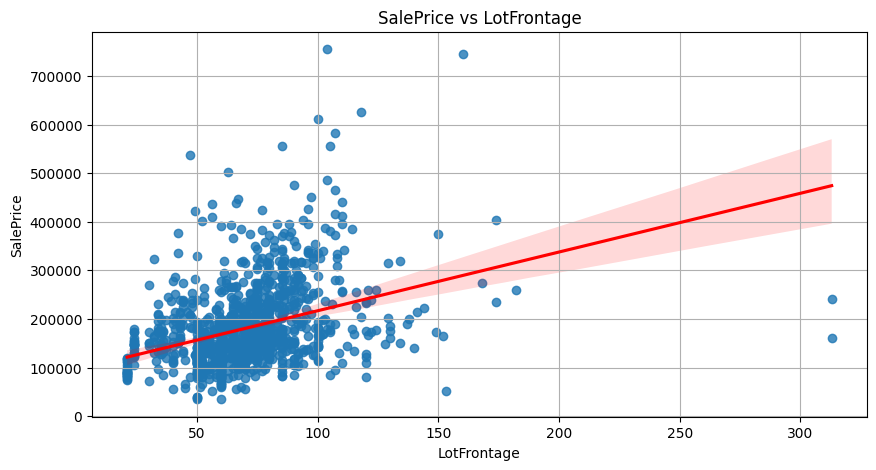

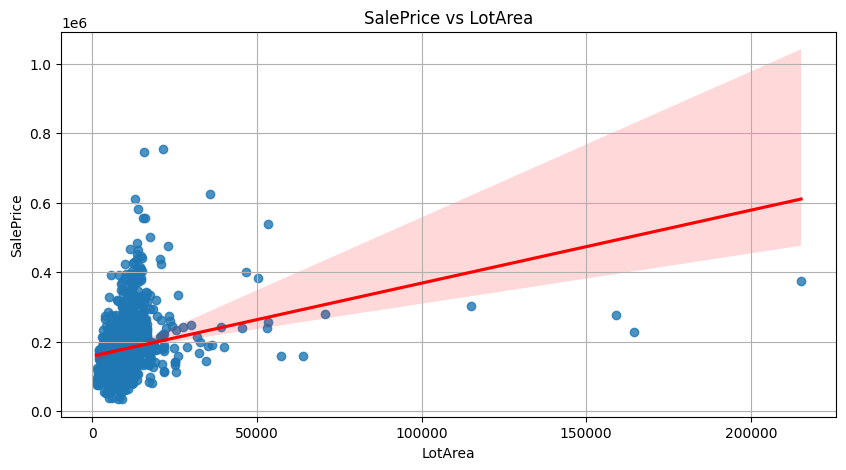

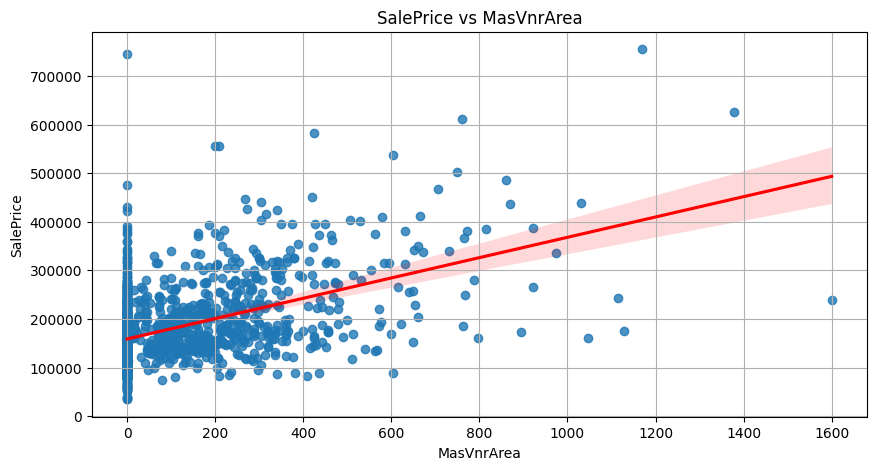

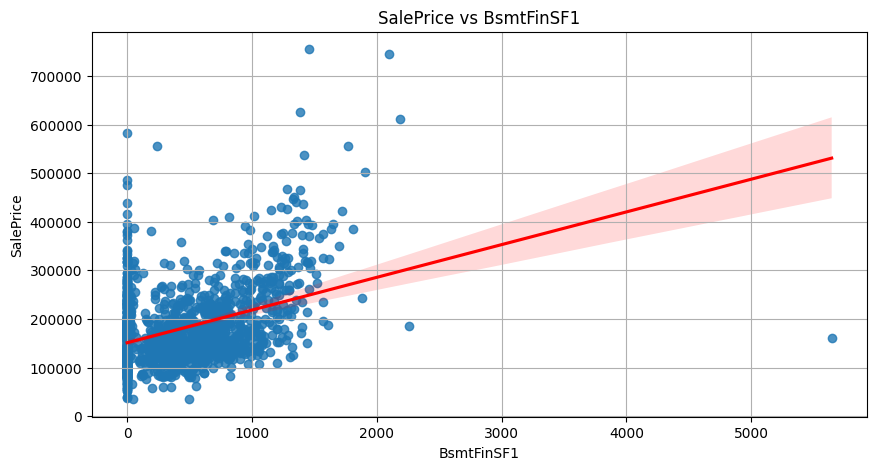

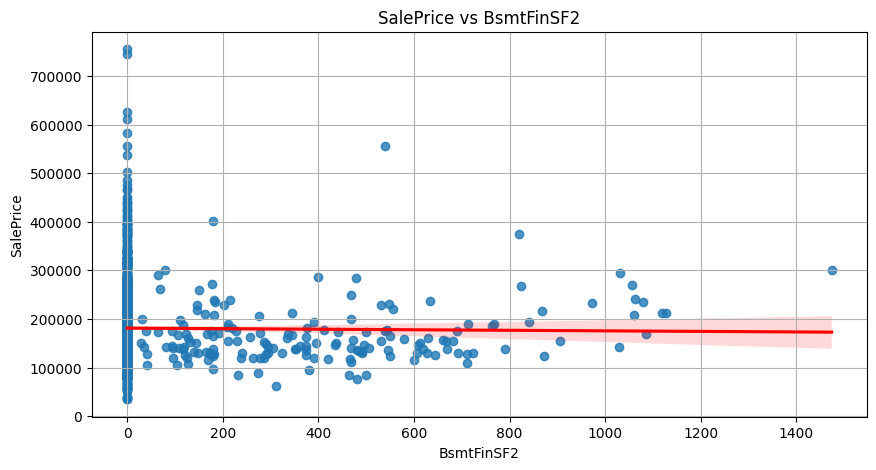

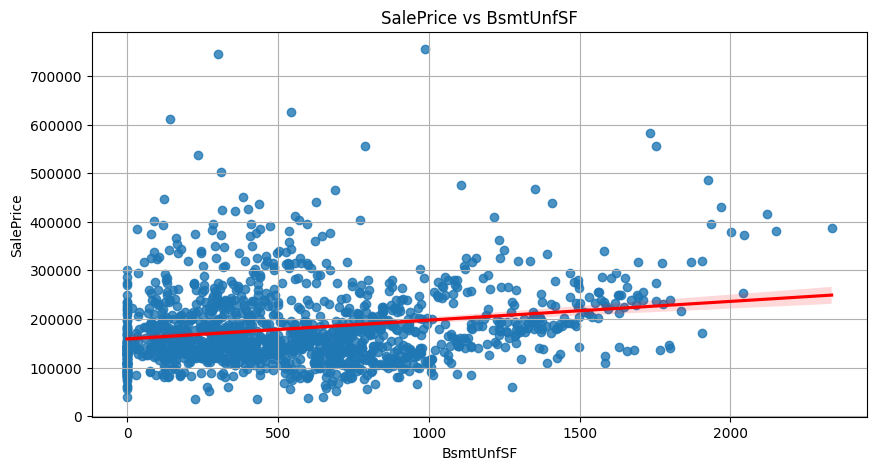

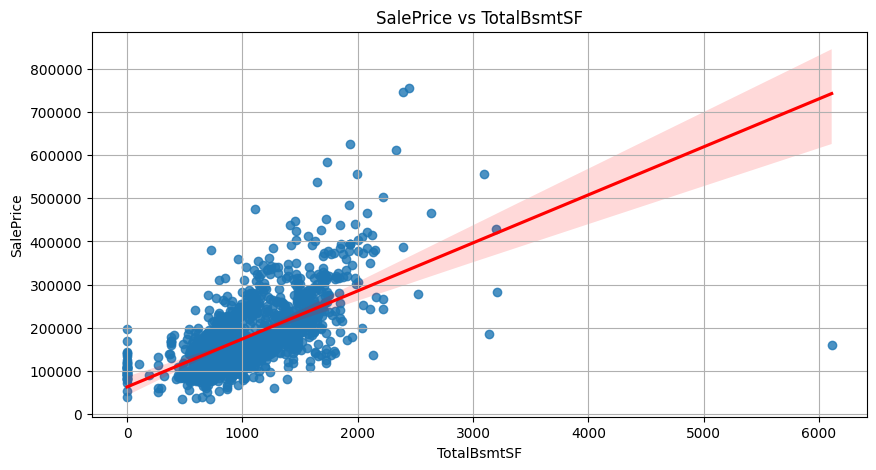

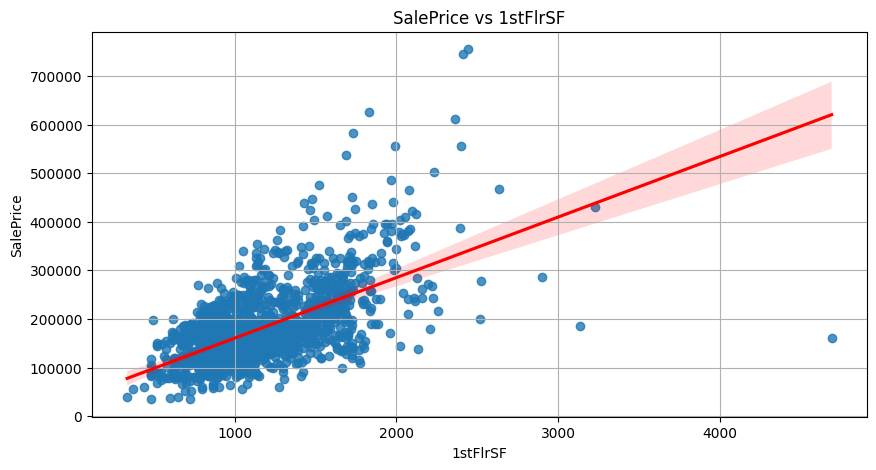

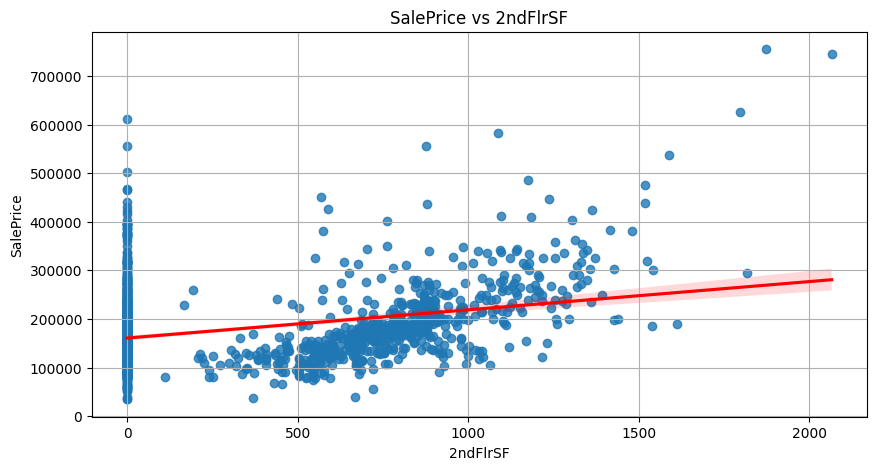

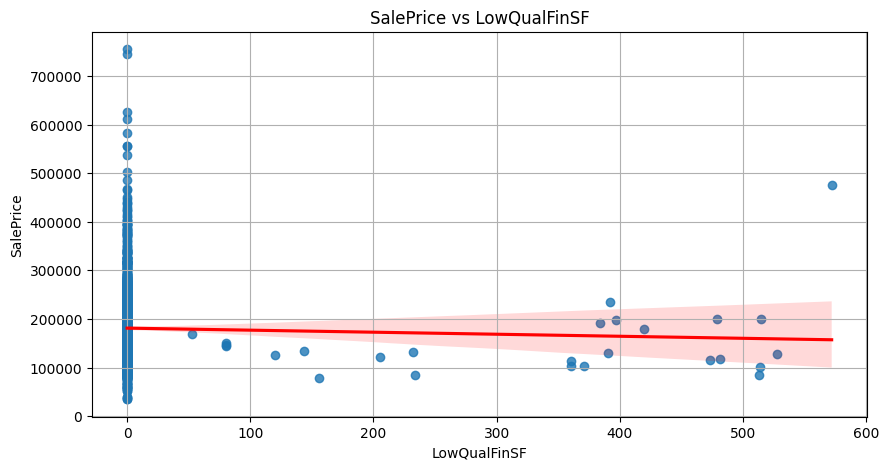

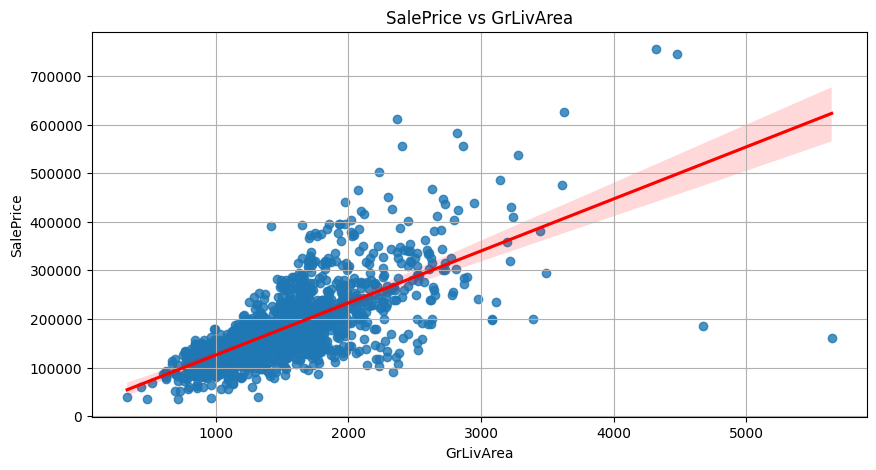

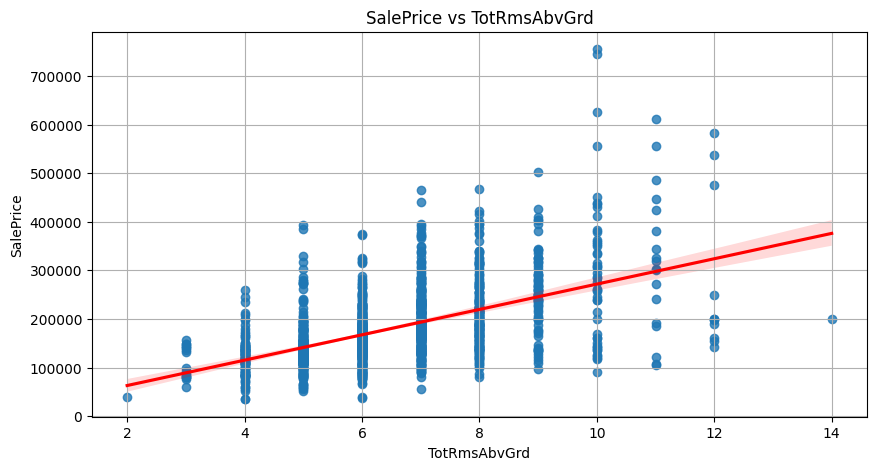

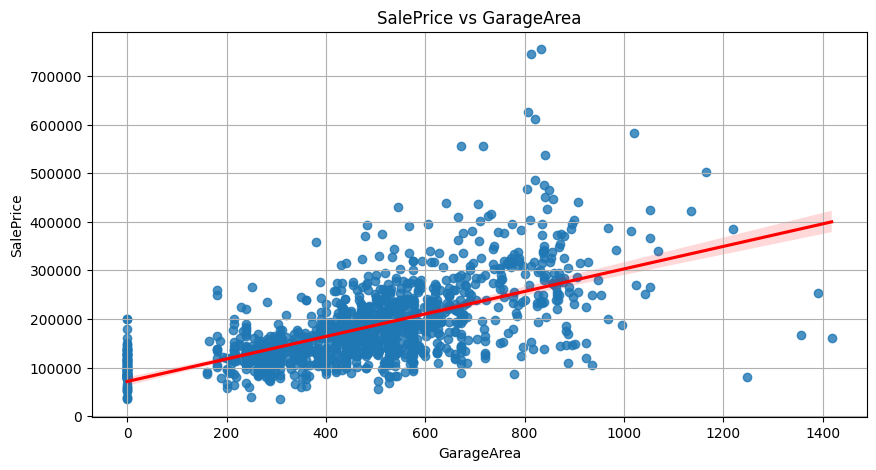

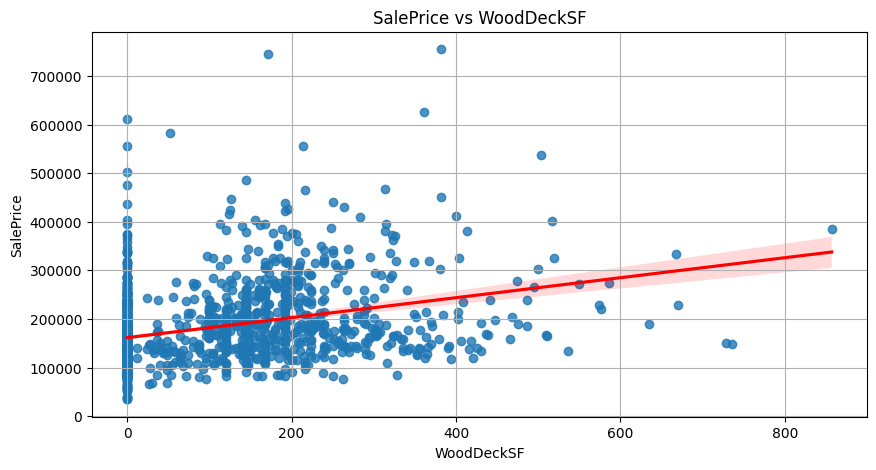

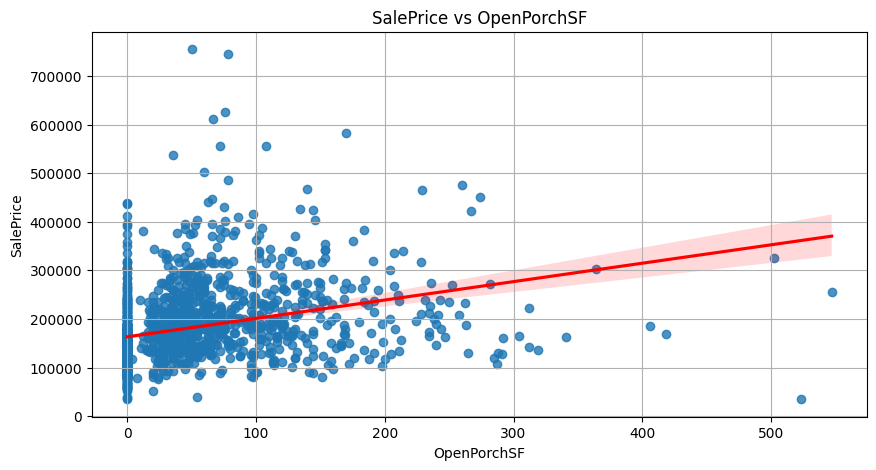

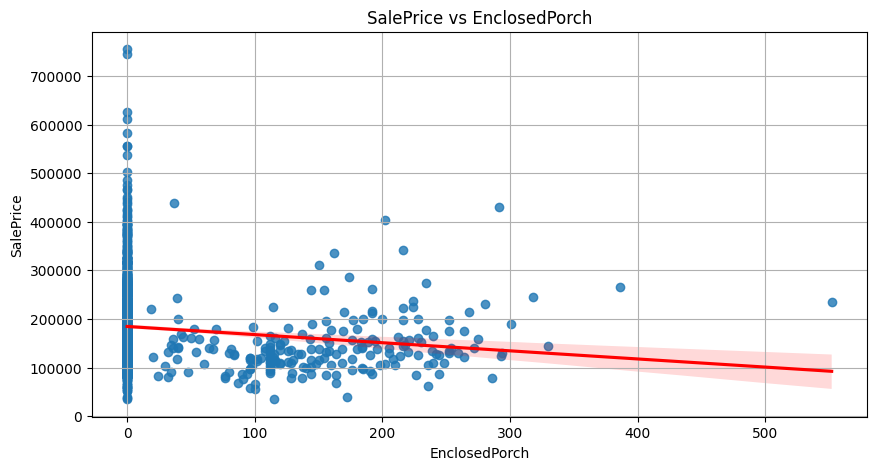

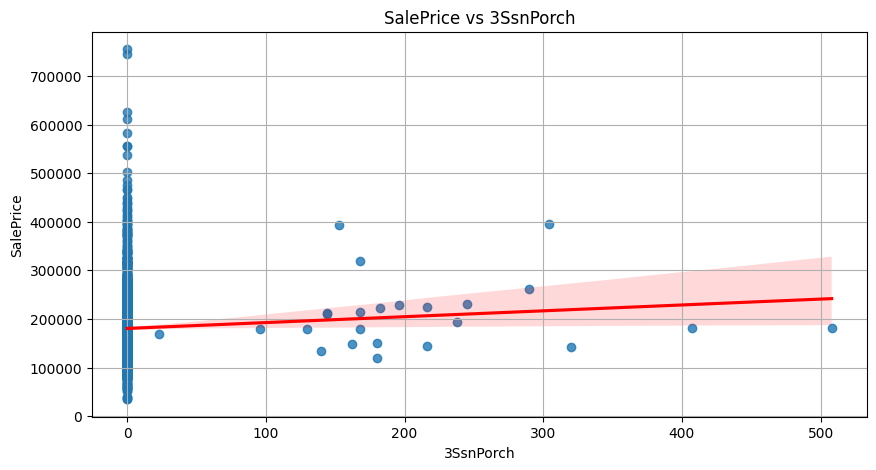

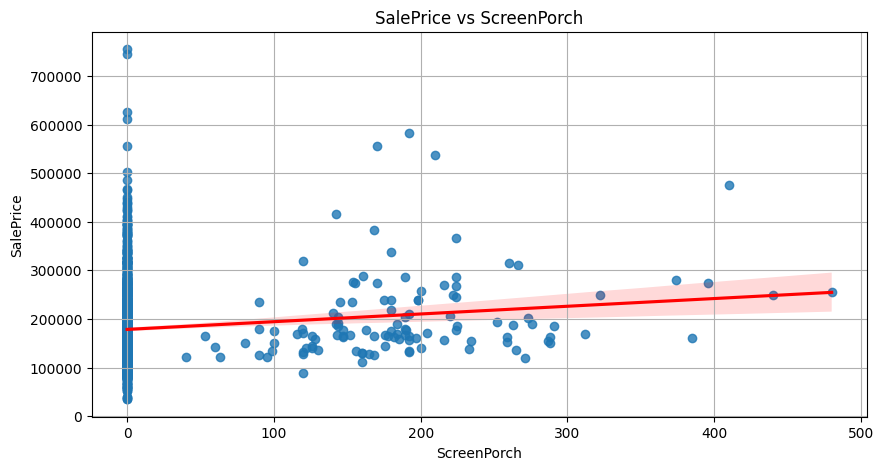

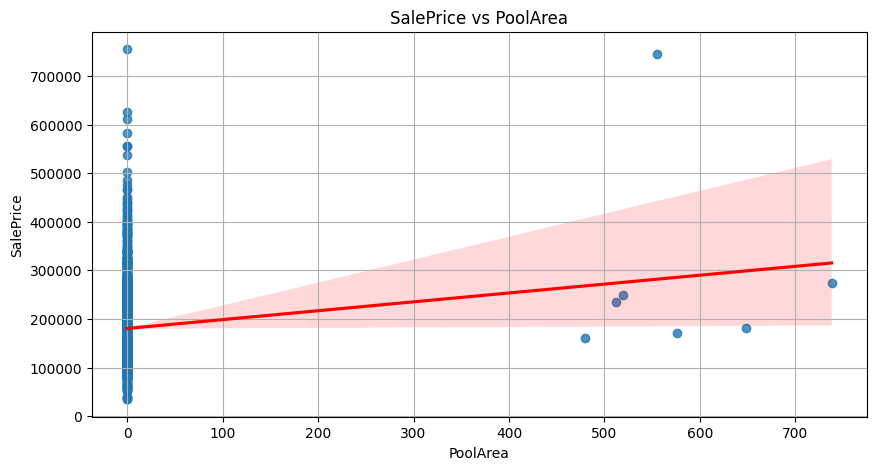

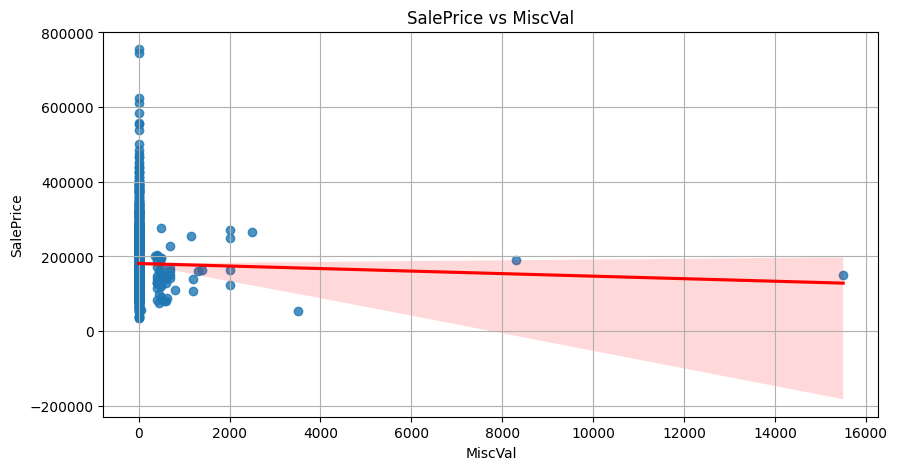

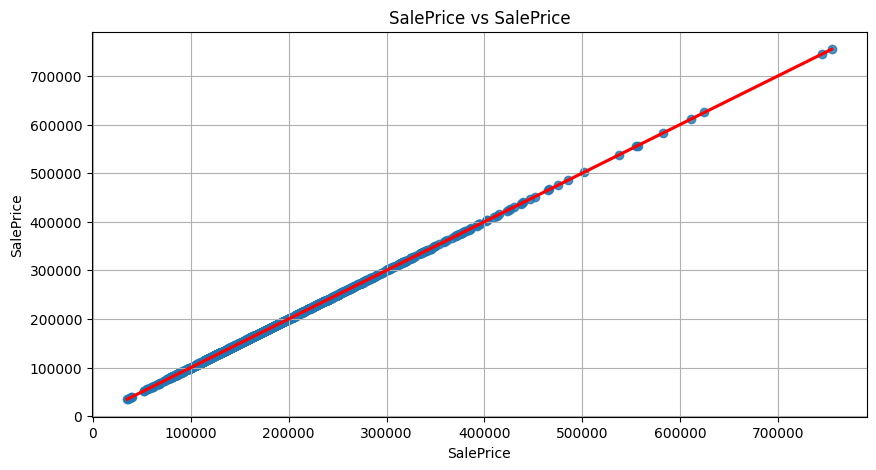

In [38]:
# applying the function:

analyze_continuous_target(df,"SalePrice",num_cols)

In [39]:
# visualisation the date columns:

def analyze_date_target(df, year_columns, month_columns, target):
    # Year & Month formats:
    for col in year_columns:
        pd.to_datetime(df[col]).dt.year
        
    for col in month_columns:
        pd.to_datetime(df[col]).dt.month

    # Visualisation: 
    if len(year_columns) > 0:
        for col in year_columns:
            # Calculating annual average sales prices:
            yearly_avg = df.groupby(col)[target].mean().reset_index()
            # Creating the chart:
            plt.figure(figsize=(10, 5))
            plt.plot(yearly_avg[col], yearly_avg[target], marker='o', linestyle='-')
            plt.title(f'Average {target} by Year')
            plt.xlabel('Year')
            plt.ylabel(f'Average {target}')
            plt.grid(True)
            plt.show()
            
    if len(month_columns) > 0:
        for col in month_columns:
            # Calculating monthly average sales prices:
            monthly_avg = df.groupby(col)[target].mean().reset_index()
            # Creating the chart:
            plt.figure(figsize=(10, 5))
            plt.plot(monthly_avg[col], monthly_avg[target], marker='o', linestyle='-')
            plt.title(f'Average {target} by Month')
            plt.xlabel('Month')
            plt.ylabel(f'Average {target}')
            plt.grid(True)
            plt.show()

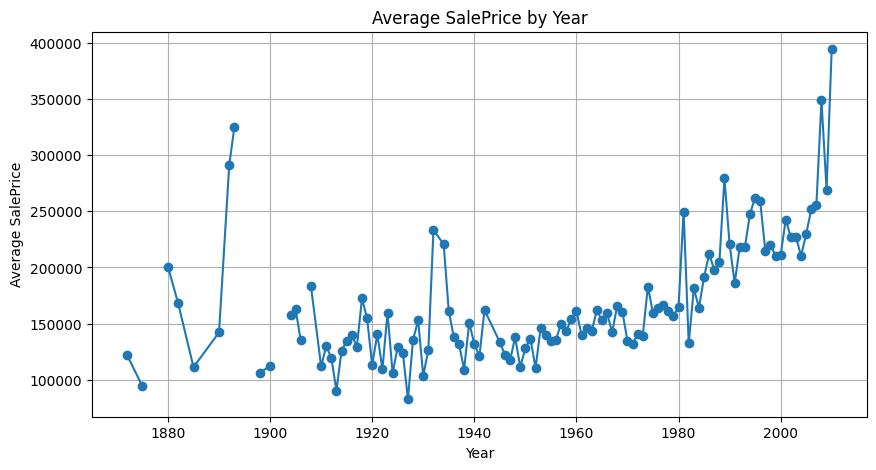

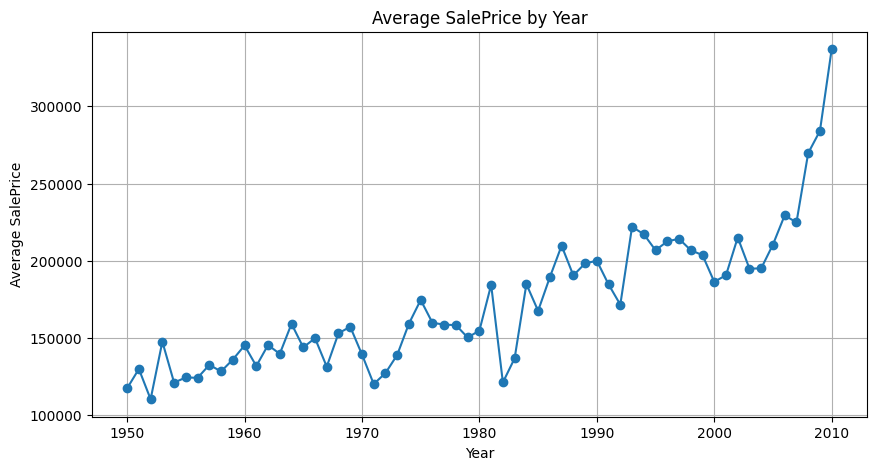

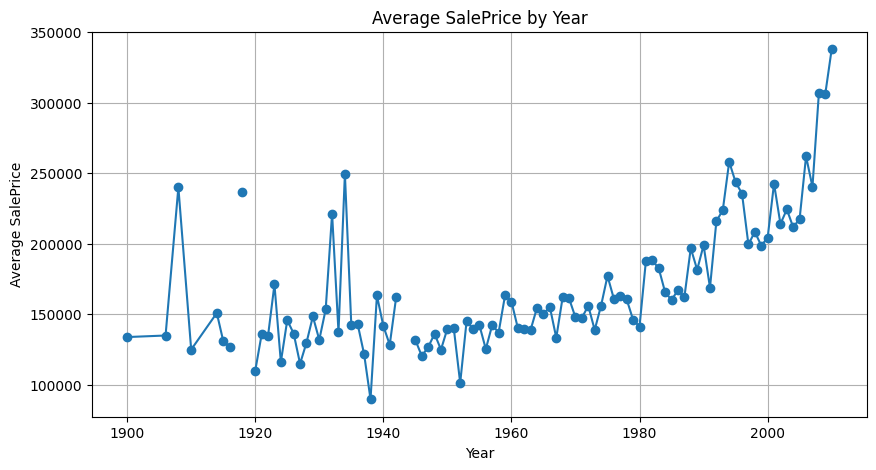

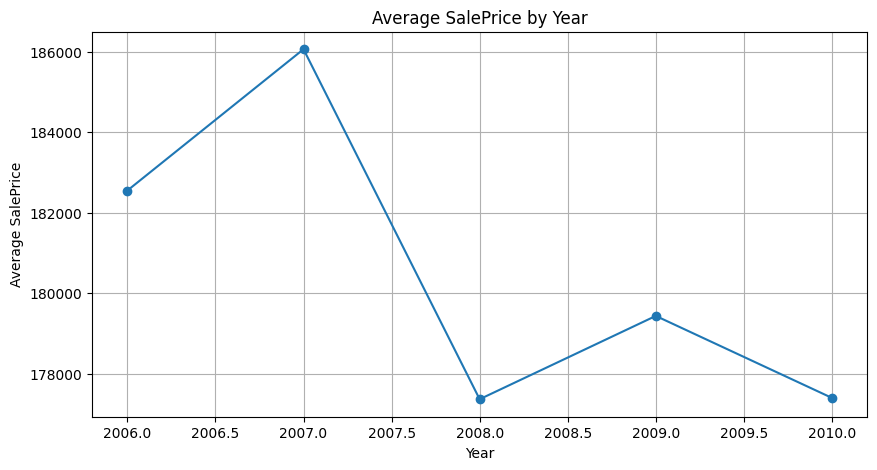

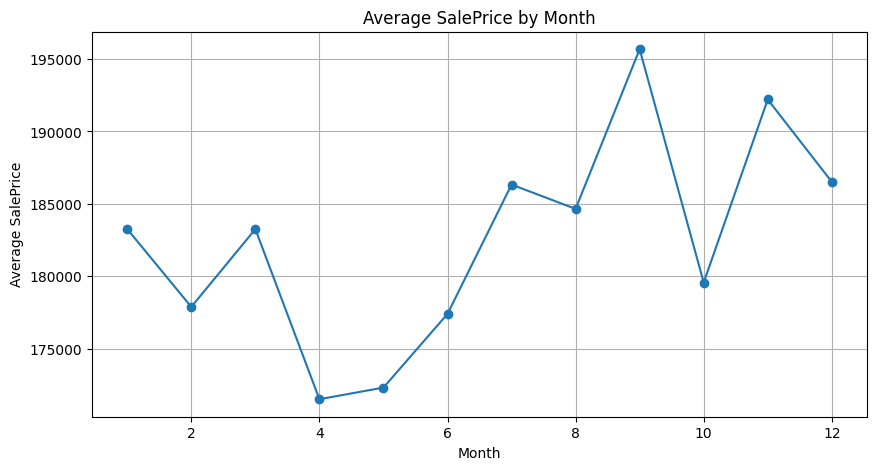

In [40]:
# applying the function:

analyze_date_target(df,['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'],['MoSold'],"SalePrice")

<a id = "8"></a>
### 4.4 Outlier Analysis

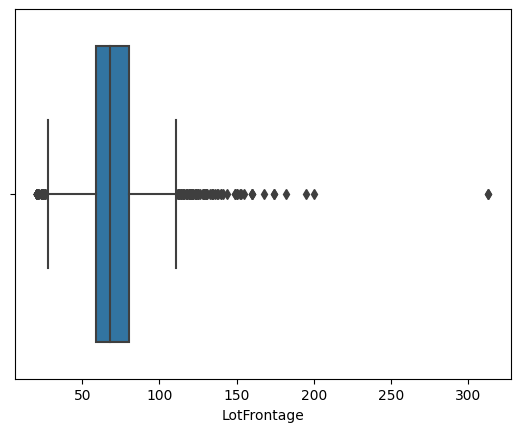

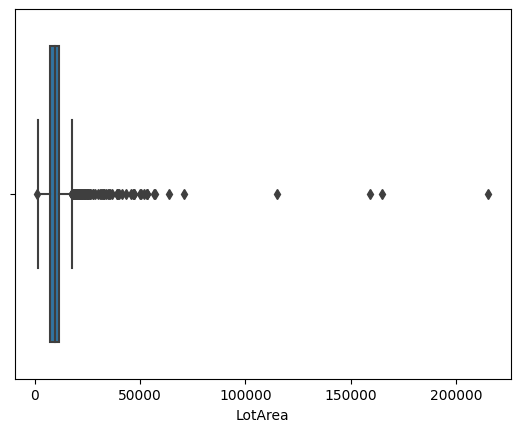

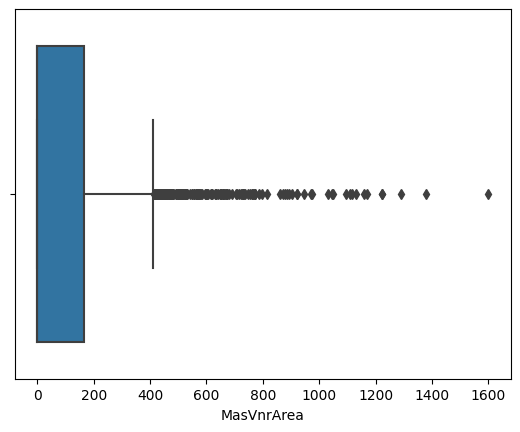

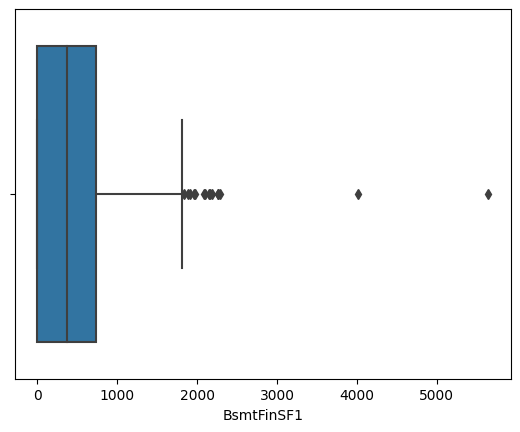

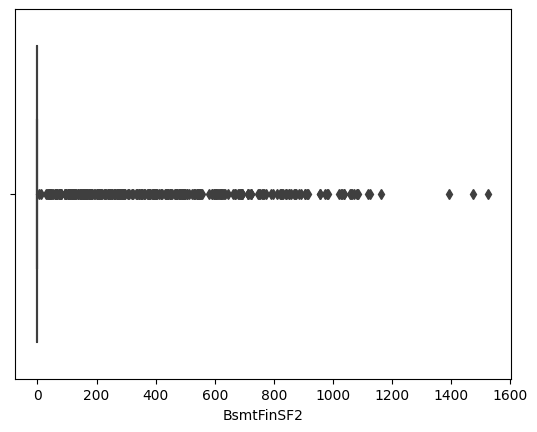

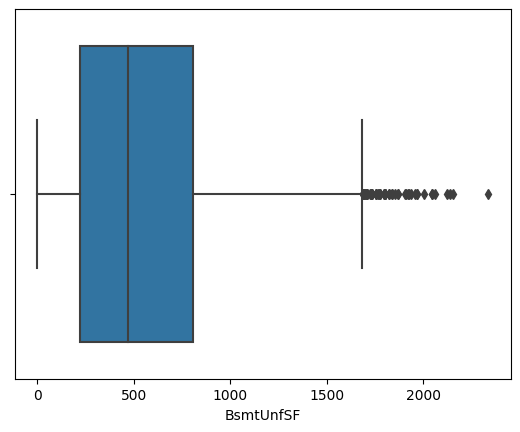

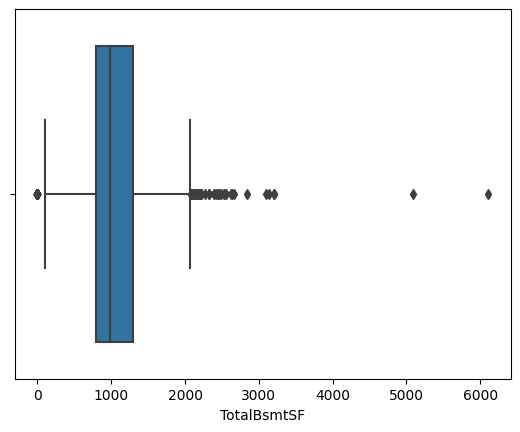

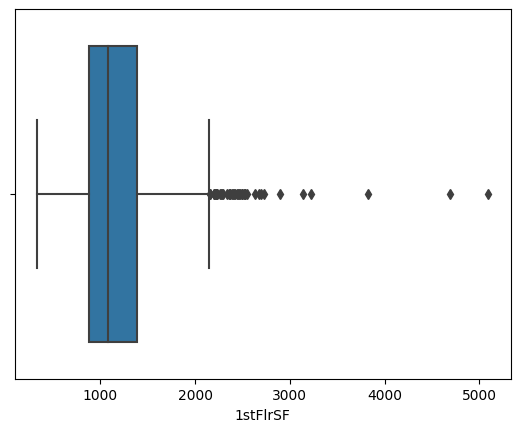

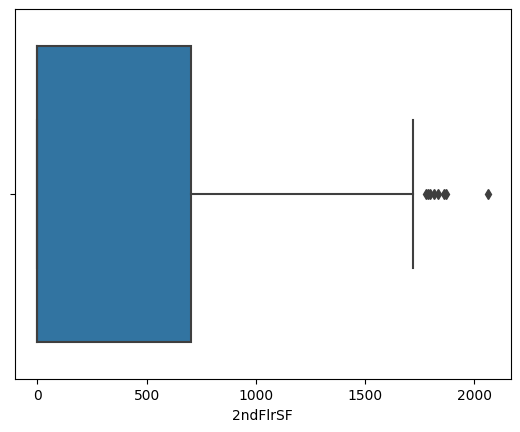

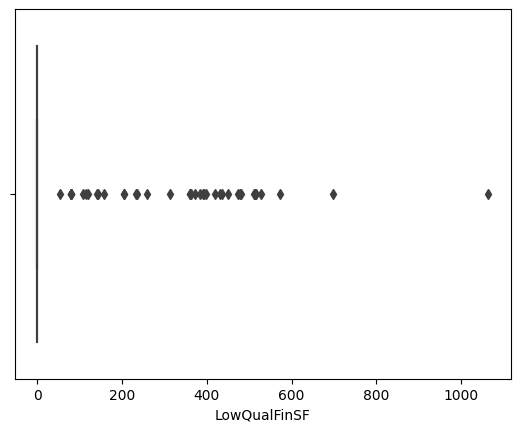

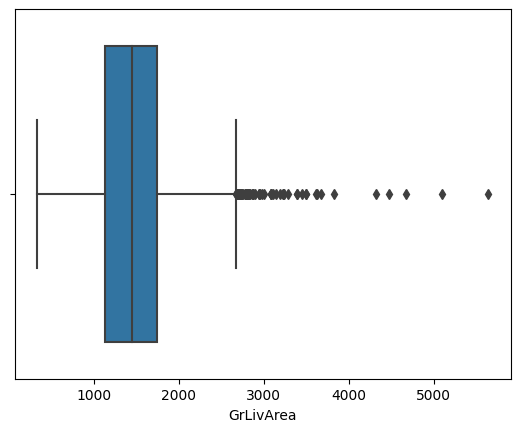

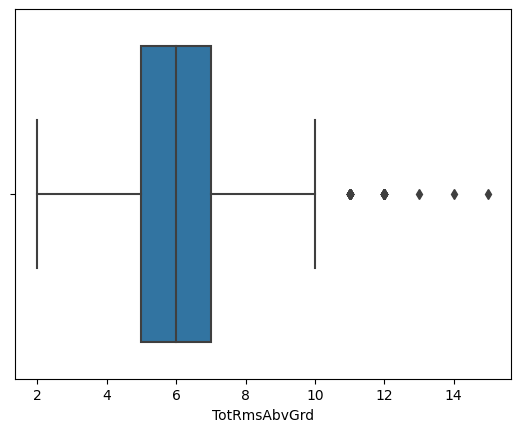

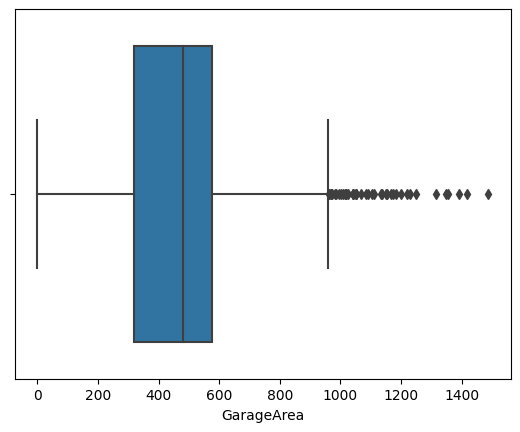

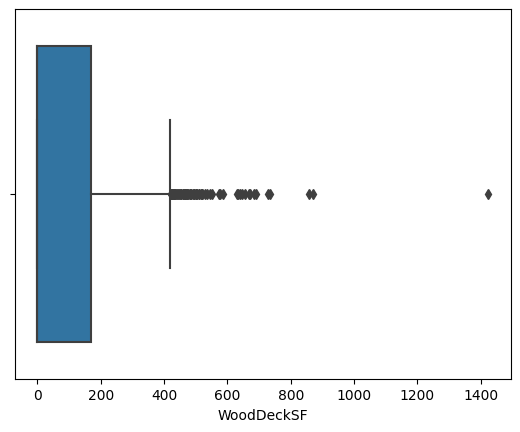

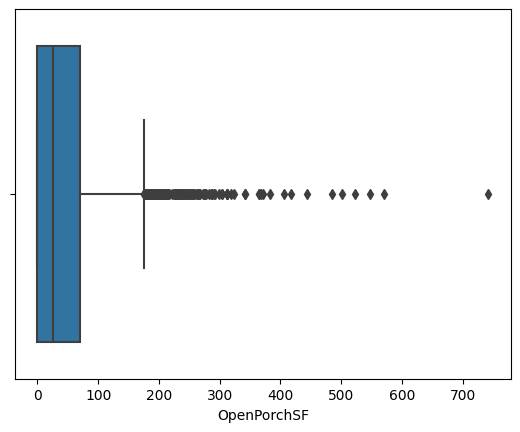

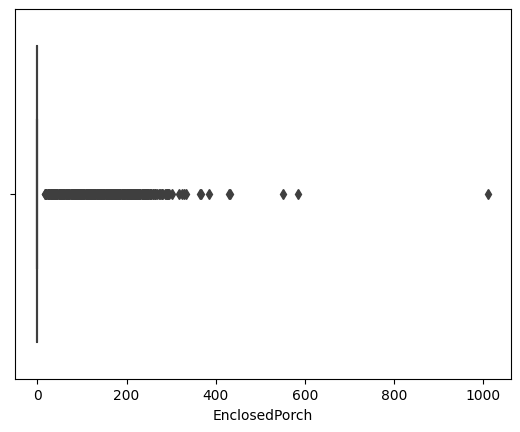

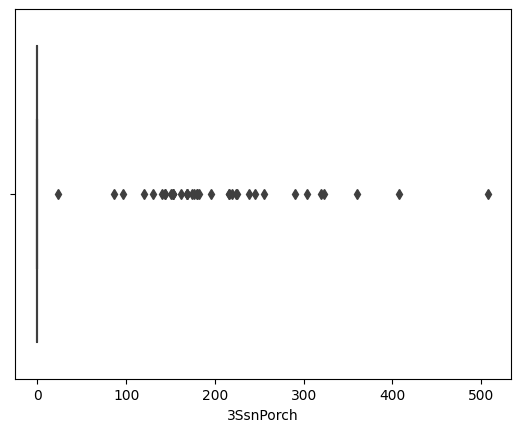

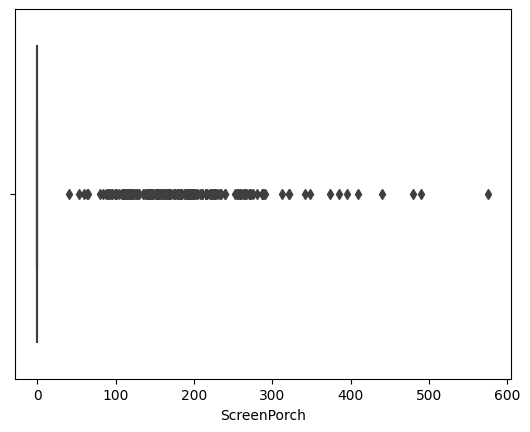

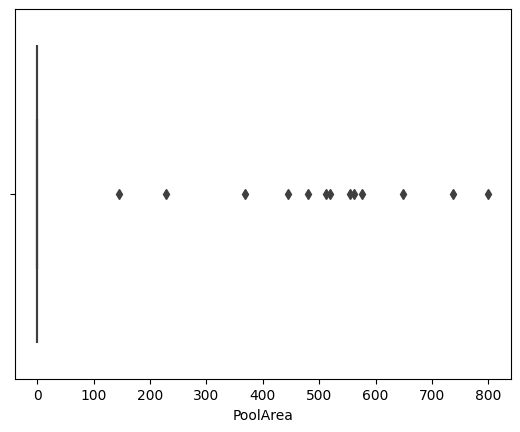

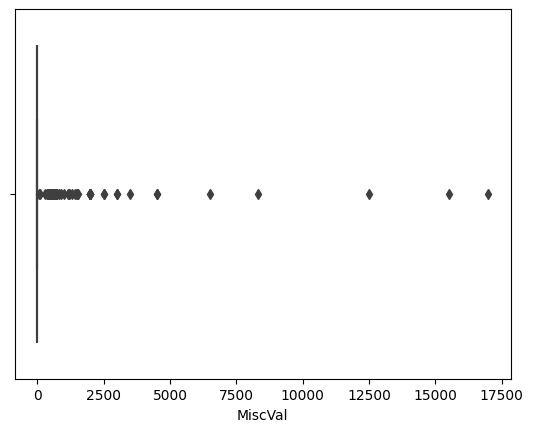

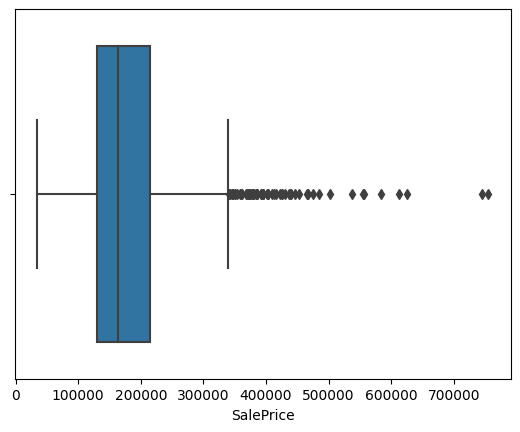

In [41]:
# outlier analysis using graphical techniques:

for col in num_cols:
    sns.boxplot(x= df[col])
    plt.show()

In [42]:
# calculating ouitlier thresholds:

def outlier_thresholds(dataframe,col_name,q1=0.01,q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5*interquantile_range
    low_limit = quartile1 - 1.5*interquantile_range
    return low_limit, up_limit

In [43]:
# checking outlier in the dataframe:

def check_outlier(dataframe, col_name):
    if pd.api.types.is_numeric_dtype(dataframe[col_name]):
        low, up = outlier_thresholds(dataframe, col_name)
        return (dataframe[col_name] > up) | (dataframe[col_name] < low)
    else:
        return pd.Series(False, index=dataframe.index)

In [44]:
#checking results:
check_outlier(df, num_cols).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [45]:
#defining a function to check columns outliers:

def check_all_columns_outliers(dataframe,num_cols):
    results = {}
    for col in num_cols:
        results[col] = check_outlier(dataframe, col).any() if pd.api.types.is_numeric_dtype(dataframe[col]) else False
    return results

In [46]:
#checking results:

check_all_columns_outliers(df,num_cols)

{'LotFrontage': True,
 'LotArea': True,
 'MasVnrArea': False,
 'BsmtFinSF1': True,
 'BsmtFinSF2': False,
 'BsmtUnfSF': False,
 'TotalBsmtSF': True,
 '1stFlrSF': True,
 '2ndFlrSF': False,
 'LowQualFinSF': True,
 'GrLivArea': False,
 'TotRmsAbvGrd': False,
 'GarageArea': False,
 'WoodDeckSF': True,
 'OpenPorchSF': True,
 'EnclosedPorch': True,
 '3SsnPorch': True,
 'ScreenPorch': False,
 'PoolArea': True,
 'MiscVal': True,
 'SalePrice': False}

In [47]:
# listing columns based on outlier information:

def show_column_names_with_outliers_info(dataframe,col_list):
    print("################# Numeric Columns Outlier Thresholds: Low & Up Limit  #####################")
    for col in col_list:
        low, up = outlier_thresholds(dataframe,col)
        print(f"{col} : low: {low}, up: {up}",end ="\n")
    print(end="\n\n")
    no_outliers = []
    have_outliers = []
    for col,value in check_all_columns_outliers(dataframe,col_list).items():
        if value:
            have_outliers.append(col)
        else:
            no_outliers.append(col)
    print("################# Numeric Columns Have Outliers  #####################")
    print(have_outliers)
    print(f"count_columns: {len(have_outliers)}", end="\n\n")
    print("################# Numeric Columns Have NOT Outliers #####################")
    print(no_outliers)
    print(f"count_columns: {len(no_outliers)}", end="\n\n")
    return have_outliers,no_outliers


In [48]:
# applying the function:

have_outliers,no_outliers = show_column_names_with_outliers_info(df,num_cols)

################# Numeric Columns Outlier Thresholds: Low & Up Limit  #####################
LotFrontage : low: -151.01999999999975, up: 307.6999999999996
LotArea : low: -45357.96000000011, up: 80076.60000000018
MasVnrArea : low: -1156.5750000000003, up: 1927.6250000000005
BsmtFinSF1 : low: -2452.9799999999996, up: 4088.2999999999993
BsmtFinSF2 : low: -1311.9899999999998, up: 2186.6499999999996
BsmtUnfSF : low: -2664.7349999999997, up: 4441.224999999999
TotalBsmtSF : low: -3297.449999999999, up: 5495.749999999998
1stFlrSF : low: -2132.0300000000025, up: 4940.050000000005
2ndFlrSF : low: -2100.3000000000025, up: 3500.500000000004
LowQualFinSF : low: -230.76000000000295, up: 384.6000000000049
GrLivArea : low: -2715.030000000011, up: 6326.170000000018
TotRmsAbvGrd : low: -6.5, up: 21.5
GarageArea : low: -1529.2349999999997, up: 2548.7249999999995
WoodDeckSF : low: -751.2300000000002, up: 1252.0500000000004
OpenPorchSF : low: -426.69000000000074, up: 711.1500000000012
EnclosedPorch : low: -

<a id = "9"></a>
### 4.5 Correlation Analysis

In [49]:
# calculating correlation :

corr = df[num_cols].corr()
corr

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  TotRmsAbvGrd  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice
LotFrontage          1.000    0.490       0.221       0.219       0.047      0.114        0.355     0.458     0.027         0.005      0.382         0.350       0.360       0.122        0.165          0.012      0.028        0.076     0.174    0.044      0.352
LotArea              0.490    1.000       0.126       0.194       0.084      0.021        0.254     0.332     0.032         0.001      0.285         0.214       0.213       0.158        0.105          0.021      0.016        0.054     0.094    0.069      0.264
MasVnrArea           0.221    0.126       1.000       0.303      -0.016      0.090        0.397     0.396     0.121        -0.058      0.403         0.278       0.374       0.166        0.145         -0.111      0.014        0.065     0.005    0.045      0.477
BsmtFinSF1           0.219    0.194       0.303       1.000      -0.055     -0.477        0.536     0.458    -0.162        -0.066      0.212         0.052       0.310       0.223        0.124         -0.100      0.051        0.097     0.084    0.093      0.386
BsmtFinSF2           0.047    0.084      -0.016      -0.055       1.000     -0.238        0.089     0.084    -0.098        -0.005     -0.018        -0.048       0.003       0.098       -0.006          0.033     -0.023        0.063     0.045   -0.005     -0.011
BsmtUnfSF            0.114    0.021       0.090      -0.477      -0.238      1.000        0.412     0.297    -0.000         0.047      0.234         0.248       0.164      -0.039        0.120          0.005     -0.006       -0.049    -0.032   -0.010      0.214
TotalBsmtSF          0.355    0.254       0.397       0.536       0.089      0.412        1.000     0.802    -0.206        -0.023      0.445         0.282       0.486       0.230        0.246         -0.086      0.038        0.075     0.072    0.084      0.614
1stFlrSF             0.458    0.332       0.396       0.458       0.084      0.297        0.802     1.000    -0.250        -0.013      0.563         0.392       0.492       0.227        0.239         -0.066      0.044        0.098     0.122    0.093      0.606
2ndFlrSF             0.027    0.032       0.121      -0.162      -0.098     -0.000       -0.206    -0.250     1.000         0.018      0.655         0.585       0.129       0.090        0.185          0.055     -0.032        0.011     0.045   -0.005      0.319
LowQualFinSF         0.005    0.001      -0.058      -0.066      -0.005      0.047       -0.023    -0.013     0.018         1.000      0.097         0.102      -0.054      -0.016       -0.001          0.087     -0.005        0.007     0.035   -0.006     -0.026
GrLivArea            0.382    0.285       0.403       0.212      -0.018      0.234        0.445     0.563     0.655         0.097      1.000         0.808       0.485       0.251        0.342          0.003      0.006        0.086     0.135    0.067      0.709
TotRmsAbvGrd         0.350    0.214       0.278       0.052      -0.048      0.248        0.282     0.392     0.585         0.102      0.808         1.000       0.329       0.157        0.238          0.015     -0.026        0.032     0.072    0.061      0.534
GarageArea           0.360    0.213       0.374       0.310       0.003      0.164        0.486     0.492     0.129        -0.054      0.485         0.329       1.000       0.238        0.233         -0.106      0.029        0.062     0.053    0.008      0.623
WoodDeckSF           0.122    0.158       0.166       0.223       0.098     -0.039        0.230     0.227     0.090        -0.016      0.251         0.157       0.238       1.000        0.038         -0.119     -0.004       -0.052     0.094    0.057      0.324
OpenPorchSF          0.165    0.105       0.145       0.124      -0.006      0.120        0.246     

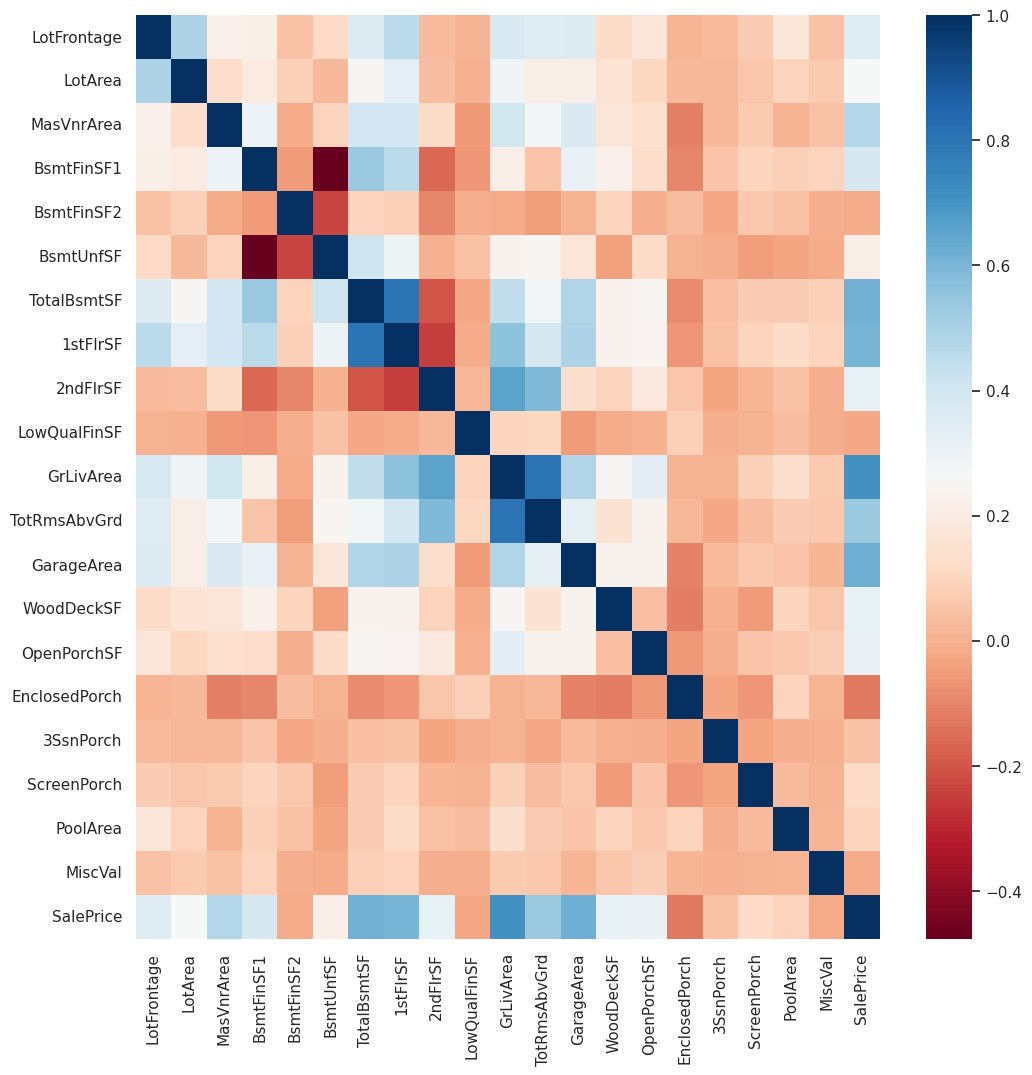

In [50]:
# correlation graph:

sns.set(rc = {"figure.figsize":(12,12)})
sns.heatmap(corr,cmap = "RdBu")
plt.show()

In [51]:
# high correlation columns 
# list of items to be dropped:

def high_correlated_cols(dataframe,plot= False, corr_th = 0.90):
    import numpy as np
    corr = dataframe.corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any (upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc = {"figure.figsize":(15,15)})
        sns.heatmap(corr_matrix,cmap = "RdBu")
        plt.show()
    return drop_list

In [52]:
# applying the function:

high_correlated_cols(df[num_cols],plot=False)

[]

<a id = "10"></a>
## 5. Data Preprocessing

<a id = "11"></a>
### 5.1 Missing Values 

In [53]:
# defining a function for missing values:

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

In [54]:
# creating a list:

no_cols = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu",
           "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [55]:
# filling the no_cols:

for col in no_cols:
    df[col].fillna("No", inplace=True)

In [56]:
# checking:

missing_values_table(df)

              n_miss  ratio
MasVnrType      1766 60.500
SalePrice       1459 49.980
LotFrontage      486 16.650
GarageYrBlt      159  5.450
MasVnrArea        23  0.790
MSZoning           4  0.140
BsmtFullBath       2  0.070
BsmtHalfBath       2  0.070
Functional         2  0.070
Utilities          2  0.070
Exterior2nd        1  0.030
BsmtFinSF1         1  0.030
BsmtFinSF2         1  0.030
BsmtUnfSF          1  0.030
Exterior1st        1  0.030
Electrical         1  0.030
KitchenQual        1  0.030
GarageCars         1  0.030
GarageArea         1  0.030
SaleType           1  0.030
TotalBsmtSF        1  0.030


In [57]:
def quick_missing_imp(data, num_method="median", cat_length=20, target="SalePrice"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]
    temp_target = data[target]
    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
    data[target] = temp_target
    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")
    return data

In [58]:
df = quick_missing_imp(df, num_method="median", cat_length=17)

# BEFORE
MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SaleType           1
SalePrice       1459
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

MSZoning           0
LotFrontage        0
Utilities          0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Electrical         0
BsmtFullBath       0
BsmtHalfBath       0
KitchenQual        0
Functional         0
GarageYrBlt        0
GarageCars         0
GarageArea         0
SaleType      

<a id = "12"></a>
### 5.2 Outlier Suppression

In [59]:
# outlier suppression:

def replace_with_thresholds(dataframe,variable):
    low, up = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low),variable] = low
    dataframe.loc[(dataframe[variable] > up),variable] = up

In [60]:
df[have_outliers].dtypes

LotFrontage      float64
LotArea            int64
BsmtFinSF1       float64
TotalBsmtSF      float64
1stFlrSF           int64
LowQualFinSF       int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
PoolArea           int64
MiscVal            int64
dtype: object

In [61]:
#applying the function:

for col in have_outliers:
    if col not in ["SalePrice"]:
        replace_with_thresholds(df, col)

<a id = "13"></a>
### 5.3 Encoding for Base Model

In [62]:
df_base = df.copy()

In [63]:
# for categorical columns:

In [64]:
# defining a function for rare analysis:

def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"Count": dataframe[col].value_counts(),
                            "Ratio": dataframe[col].value_counts() / len(dataframe),
                            "Target_Mean": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [65]:
# defining a function for rare encoding:

def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    return temp_df

In [66]:
# applying the function:

rare_encoder(df_base, 0.01)
df_base.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0   1          60       RL       65.000  8450.000   Pave    No      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ     706.000          Unf       0.000    150.000      856.000    GasA        Ex          Y      SBrkr   856.000       854         0.000   
1   2          20       RL       80.000  9600.000   Pave    No      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd    BrkFace       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ     978.000          Unf       0.000    284.000     1262.000    GasA        Ex          Y      SBrkr  1262.000         0         0.000   
2   3          60       RL       68.000 11250.000   Pave    No      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ     486.000          Unf       0.000    434.000      920.000    GasA        Ex          Y      SBrkr   920.000       866         0.000   
3   4          70       RL       60.000  9550.000   Pave    No      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng    BrkFace       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ     216.000          Unf       0.000    540.000      756.000    GasA        Gd          Y      SBrkr   961.000       756         0.000   
4   5          60       RL       84.000 14260.000   Pave    No      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc       Gd       TA           Av          GLQ     655.000          Unf       0.000    490.000     1145.000    GasA        Ex          Y      SBrkr  1145.000      1053         0.000   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0       1710         1.000         0.000         2         1             3             1          Gd             8        Typ           0          No     Attchd     2003.000          RFn       2.000     548.000         TA         TA          Y       0.000       61.000              0          0            0         0     No    No          No    0.000       2    2008       WD        Normal 208500.000  
1       1262         0.000         1.000         2         0             3             1          TA             6        Typ           1          TA     Attchd     1976.000          RFn       2.000  

In [67]:
# defining a function for label encoding:

def label_encoder(dataframe,cols):
    labelencoder = LabelEncoder()
    dataframe[cols] = labelencoder.fit_transform(dataframe[cols])
    return dataframe

In [68]:
# creating a list to label encoding:

# binary columns:

binary_cols = [col for col in df_base.columns if (df_base[col].dtypes not in ["float64","int64","int32"]) & (df_base[col].nunique() == 2)]
binary_cols

['Street', 'Utilities', 'CentralAir']

In [69]:
# applying the function:

for col in binary_cols:
    label_encoder(df_base,col)

In [70]:
# defining a function for one-hot encoding:

def one_hot_encoder(dataframe,cols,drop_first=True):
    dataframe = pd.get_dummies(dataframe,columns = cols, drop_first=drop_first)
    return dataframe

In [71]:
# creating a list to apply one-hot encoding:

# nominal columns:

ohe_cols = [col for col in df_base.columns if (df_base[col].dtype not in ["float64","int64","int32"]) & ((df_base[col].nunique() > 2) | (df_base[col].nunique() == 1))]
ohe_cols

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [72]:
# applying the function:

df_base = one_hot_encoder(df_base,ohe_cols)

In [73]:
#checking:

df_base.head()

Id  MSSubClass  LotFrontage   LotArea  Street  Utilities  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  MSZoning_FV  \
0   1          60       65.000  8450.000       1          0            7            5       2003          2003     196.000     706.000       0.000    150.000      856.000           1   856.000       854         0.000       1710         1.000         0.000         2         1             3             1             8           0     2003.000       2.000     548.000       0.000       61.000              0          0            0         0    0.000       2    2008 208500.000        False   
1   2          20       80.000  9600.000       1          0            6            8       1976          1976       0.000     978.000       0.000    284.000     1262.000           1  1262.000         0         0.000       1262         0.000         1.000         2         0             3             1             6           1     1976.000       2.000     460.000     298.000        0.000              0          0            0         0    0.000       5    2007 181500.000        False   
2   3          60       68.000 11250.000       1          0            7            5       2001          2002     162.000     486.000       0.000    434.000      920.000           1   920.000       866         0.000       1786         1.000         0.000         2         1             3             1             6           1     2001.000       2.000     608.000       0.000       42.000              0          0            0         0    0.000       9    2008 223500.000        False   
3   4          70       60.000  9550.000       1          0            7            5       1915          1970       0.000     216.000       0.000    540.000      756.000           1   961.000       756         0.000       1717         1.000         0.000         1         0             3             1             7           1     1998.000       3.000     642.000       0.000       35.000            272          0            0         0    0.000       2    2006 140000.000        False   
4   5          60       84.000 14260.000       1          0            8            5       2000          2000     350.000     655.000       0.000    490.000     1145.000           1  1145.000      1053         0.000       2198         1.000         0.000         2         1             4             1             9           1     2000.000       3.000     836.000     192.000       84.000              0          0            0         0    0.000      12    2008 250000.000        False   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_No  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0        False         True        False      True       False         False         False          True            False            False             True              False          False          False              True          False          False                 False                False                 False                 False                  True                 False                 False                 False                False                 False                 False   
1        False         True        False      True  

In [74]:
#checking:

df.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0   1          60       RL       65.000  8450.000   Pave    No      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ     706.000          Unf       0.000    150.000      856.000    GasA        Ex          Y      SBrkr   856.000       854         0.000   
1   2          20       RL       80.000  9600.000   Pave    No      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd    BrkFace       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ     978.000          Unf       0.000    284.000     1262.000    GasA        Ex          Y      SBrkr  1262.000         0         0.000   
2   3          60       RL       68.000 11250.000   Pave    No      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ     486.000          Unf       0.000    434.000      920.000    GasA        Ex          Y      SBrkr   920.000       866         0.000   
3   4          70       RL       60.000  9550.000   Pave    No      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng    BrkFace       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ     216.000          Unf       0.000    540.000      756.000    GasA        Gd          Y      SBrkr   961.000       756         0.000   
4   5          60       RL       84.000 14260.000   Pave    No      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc       Gd       TA           Av          GLQ     655.000          Unf       0.000    490.000     1145.000    GasA        Ex          Y      SBrkr  1145.000      1053         0.000   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0       1710         1.000         0.000         2         1             3             1          Gd             8        Typ           0          No     Attchd     2003.000          RFn       2.000     548.000         TA         TA          Y       0.000       61.000              0          0            0         0     No    No          No    0.000       2    2008       WD        Normal 208500.000  
1       1262         0.000         1.000         2         0             3             1          TA             6        Typ           1          TA     Attchd     1976.000          RFn       2.000  

<a id = "14"></a>
### 5.4 Scaling for Base Model

In [75]:
# for numerical columns:

In [76]:
# numerical columns not in date columns:

num_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [77]:
date_cols

['MoSold', 'YrSold', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd']

In [78]:
# standardization of numerical variables:

ss = StandardScaler()
ss_cols = num_cols + date_cols
ss_cols = [col for col in ss_cols if col not in ["SalePrice"]]
df_base[ss_cols] = ss.fit_transform(df_base[ss_cols])

In [79]:
#checking:

df_base.head()

Id  MSSubClass  LotFrontage  LotArea  Street  Utilities  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  MSZoning_FV  \
0   1          60       -0.192   -0.271       1          0            7            5      1.046         0.897       0.529       0.589      -0.293     -0.935       -0.446           1    -0.775     1.207        -0.108      0.414         1.000         0.000         2         1             3             1         0.987           0        0.999       2.000       0.349      -0.744        0.200         -0.367     -0.105       -0.286     0.000   -0.150  -1.552   0.158 208500.000        False   
1   2          20        0.515   -0.077       1          0            6            8      0.155        -0.396      -0.567       1.193      -0.293     -0.630        0.480           1     0.262    -0.785        -0.108     -0.472         0.000         1.000         2         0             3             1        -0.288           1       -0.087       2.000      -0.060       1.623       -0.704         -0.367     -0.105       -0.286     0.000   -0.150  -0.447  -0.603 181500.000        False   
2   3          60       -0.051    0.202       1          0            7            5      0.980         0.849       0.339       0.100      -0.293     -0.288       -0.300           1    -0.611     1.235        -0.108      0.564         1.000         0.000         2         1             3             1        -0.288           1        0.919       2.000       0.628      -0.744       -0.081         -0.367     -0.105       -0.286     0.000   -0.150   1.027   0.158 223500.000        False   
3   4          70       -0.428   -0.085       1          0            7            5     -1.859        -0.683      -0.567      -0.499      -0.293     -0.047       -0.674           1    -0.507     0.979        -0.108      0.427         1.000         0.000         1         0             3             1         0.350           1        0.798       3.000       0.785      -0.744       -0.185          3.972     -0.105       -0.286     0.000   -0.150  -1.552  -1.364 140000.000        False   
4   5          60        0.703    0.712       1          0            8            5      0.947         0.753       1.390       0.476      -0.293     -0.161        0.213           1    -0.037     1.672        -0.108      1.378         1.000         0.000         2         1             4             1         1.624           1        0.878       3.000       1.686       0.781        0.541         -0.367     -0.105       -0.286     0.000   -0.150   2.132   0.158 250000.000        False   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_No  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0        False         True        False      True       False         False         False          True            False            False             True              False          False          False              True          False          False                 False                False                 False                 False                  True                 False                 False                 False                False                 False                 False   
1        False         True        False      True       F

In [80]:
#checking:

df.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0   1          60       RL       65.000  8450.000   Pave    No      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ     706.000          Unf       0.000    150.000      856.000    GasA        Ex          Y      SBrkr   856.000       854         0.000   
1   2          20       RL       80.000  9600.000   Pave    No      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd    BrkFace       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ     978.000          Unf       0.000    284.000     1262.000    GasA        Ex          Y      SBrkr  1262.000         0         0.000   
2   3          60       RL       68.000 11250.000   Pave    No      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ     486.000          Unf       0.000    434.000      920.000    GasA        Ex          Y      SBrkr   920.000       866         0.000   
3   4          70       RL       60.000  9550.000   Pave    No      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng    BrkFace       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ     216.000          Unf       0.000    540.000      756.000    GasA        Gd          Y      SBrkr   961.000       756         0.000   
4   5          60       RL       84.000 14260.000   Pave    No      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc       Gd       TA           Av          GLQ     655.000          Unf       0.000    490.000     1145.000    GasA        Ex          Y      SBrkr  1145.000      1053         0.000   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0       1710         1.000         0.000         2         1             3             1          Gd             8        Typ           0          No     Attchd     2003.000          RFn       2.000     548.000         TA         TA          Y       0.000       61.000              0          0            0         0     No    No          No    0.000       2    2008       WD        Normal 208500.000  
1       1262         0.000         1.000         2         0             3             1          TA             6        Typ           1          TA     Attchd     1976.000          RFn       2.000  

<a id = "15"></a>
## 6. Base Model

<a id = "16"></a>
### 6.1 Hold-out Method 

In [81]:
# filtering train & test data:

train_df_base = df_base[df_base['SalePrice'].notnull()]
test_df_base = df_base[df_base['SalePrice'].isnull()]

In [82]:
y_base = train_df_base['SalePrice']  # dependent variable
X_base = train_df_base.drop(["Id", "SalePrice"], axis=1) # independent variables

In [83]:
# hold-out method:

X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X_base, y_base, test_size=0.20, random_state=24)

<a id = "17"></a>
### 6.2 Modeling

In [84]:
# model names:

models = [('Linear Regression', LinearRegression()), ('KNN', KNeighborsRegressor()), ('CART', DecisionTreeRegressor()),
          ('Random Forest', RandomForestRegressor()), ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')), ("LightGBM", LGBMRegressor(verbose=-1)),("CatBoost", CatBoostRegressor(verbose=0))]

In [85]:
# fitting models:

for name, regressor in models:
    regressor.fit(X_base_train, y_base_train)

<a id = "18"></a>
### 6.3 Model Performance Evaluation

In [86]:
# evaluating results:

for model_name, regressor in models:
    y_base_pred = regressor.predict(X_base_test)
    mae = mean_absolute_error(y_base_test, y_base_pred)
    mse = mean_squared_error(y_base_test, y_base_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_base_test, y_base_pred)
    print(f"{model_name}:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R2: {r2:.4f}")

Linear Regression:
  MAE: 19255.8978
  MSE: 1400900169.1054
  RMSE: 37428.6010
  R2: 0.8131
KNN:
  MAE: 21863.5432
  MSE: 1506609029.1316
  RMSE: 38815.0619
  R2: 0.7990
CART:
  MAE: 25403.7466
  MSE: 2172828053.8288
  RMSE: 46613.6037
  R2: 0.7101
Random Forest:
  MAE: 17399.4101
  MSE: 981065245.2197
  RMSE: 31321.9611
  R2: 0.8691
GBM:
  MAE: 16771.3529
  MSE: 719134899.4952
  RMSE: 26816.6907
  R2: 0.9041
XGBoost:
  MAE: 18624.5033
  MSE: 1418704281.0442
  RMSE: 37665.6910
  R2: 0.8107
LightGBM:
  MAE: 16977.8571
  MSE: 876522998.2816
  RMSE: 29606.1311
  R2: 0.8831
CatBoost:
  MAE: 15175.6304
  MSE: 738394259.0690
  RMSE: 27173.4109
  R2: 0.9015


<a id = "19"></a>
## 7. Feature Engineering

<a id = "20"></a>
### 7.1 Feature Extraction

In [87]:
# 1Story or 2Story:
    
df.loc[(df["HouseStyle"] == "1Story") | (df["HouseStyle"] == "2Story"),"New_HouseStyle"] = "1or2Story"

In [88]:
df["New_HouseStyle"] = df["New_HouseStyle"].apply(lambda x: "1or2Story" if x == "1or2Story" else "other")

In [89]:
df["New_HouseStyle"].value_counts()

New_HouseStyle
1or2Story    2343
other         576
Name: count, dtype: int64

In [90]:
df["New_1st*GrLiv"] = df["1stFlrSF"] * df["GrLivArea"]

In [91]:
df["New_1st*GrLiv"].head()

0   1463760.000
1   1592644.000
2   1643120.000
3   1650037.000
4   2516710.000
Name: New_1st*GrLiv, dtype: float64

In [92]:
df["New_Garage*GrLiv"] = df["GarageArea"] * df["GrLivArea"]

In [93]:
df["New_Garage*GrLiv"].head()

0    937080.000
1    580520.000
2   1085888.000
3   1102314.000
4   1837528.000
Name: New_Garage*GrLiv, dtype: float64

In [94]:
df["New_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]

In [95]:
df["New_TotalFlrSF"].head()

0   1710.000
1   1262.000
2   1786.000
3   1717.000
4   2198.000
Name: New_TotalFlrSF, dtype: float64

In [96]:
df["New_TotalBsmtFin"] = df["BsmtFinSF1"] + df["BsmtFinSF2"]

In [97]:
df["New_TotalBsmtFin"].head()

0   706.000
1   978.000
2   486.000
3   216.000
4   655.000
Name: New_TotalBsmtFin, dtype: float64

In [98]:
df["New_TotalSqFeet"] = df["GrLivArea"] + df["TotalBsmtSF"]

In [99]:
df["New_TotalSqFeet"].head()

0   2566.000
1   2524.000
2   2706.000
3   2473.000
4   3343.000
Name: New_TotalSqFeet, dtype: float64

In [100]:
df["New_Restoration"] = df["YearRemodAdd"] - df["YearBuilt"]

In [101]:
df["New_Restoration"].head()

0     0
1     0
2     1
3    55
4     0
Name: New_Restoration, dtype: int32

In [102]:
df["New_HouseAge"] = df["YrSold"] - df["YearBuilt"]

In [103]:
df["New_HouseAge"].head()

0     5
1    31
2     7
3    91
4     8
Name: New_HouseAge, dtype: int32

In [104]:
df["New_RestorationAge"] = df["YrSold"] - df["YearRemodAdd"]

In [105]:
df["New_RestorationAge"].head()

0     5
1    31
2     6
3    36
4     8
Name: New_RestorationAge, dtype: int32

In [106]:
df["New_GarageAge"] = df["GarageYrBlt"] - df["YearBuilt"]

In [107]:
df["New_GarageAge"].head()

0    0.000
1    0.000
2    0.000
3   83.000
4    0.000
Name: New_GarageAge, dtype: float64

In [108]:
df["New_GarageRestorationAge"] = np.abs(df["GarageYrBlt"] - df["YearRemodAdd"])

In [109]:
df["New_GarageRestorationAge"].head()

0    0.000
1    0.000
2    1.000
3   28.000
4    0.000
Name: New_GarageRestorationAge, dtype: float64

In [110]:
df["New_GarageSold"] = df["YrSold"] - df["GarageYrBlt"]

In [111]:
df["New_GarageSold"].head()

0    5.000
1   31.000
2    7.000
3    8.000
4    8.000
Name: New_GarageSold, dtype: float64

In [112]:
df.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0   1          60       RL       65.000  8450.000   Pave    No      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ     706.000          Unf       0.000    150.000      856.000    GasA        Ex          Y      SBrkr   856.000       854         0.000   
1   2          20       RL       80.000  9600.000   Pave    No      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd    BrkFace       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ     978.000          Unf       0.000    284.000     1262.000    GasA        Ex          Y      SBrkr  1262.000         0         0.000   
2   3          60       RL       68.000 11250.000   Pave    No      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ     486.000          Unf       0.000    434.000      920.000    GasA        Ex          Y      SBrkr   920.000       866         0.000   
3   4          70       RL       60.000  9550.000   Pave    No      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng    BrkFace       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ     216.000          Unf       0.000    540.000      756.000    GasA        Gd          Y      SBrkr   961.000       756         0.000   
4   5          60       RL       84.000 14260.000   Pave    No      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc       Gd       TA           Av          GLQ     655.000          Unf       0.000    490.000     1145.000    GasA        Ex          Y      SBrkr  1145.000      1053         0.000   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice New_HouseStyle  New_1st*GrLiv  New_Garage*GrLiv  New_TotalFlrSF  New_TotalBsmtFin  \
0       1710         1.000         0.000         2         1             3             1          Gd             8        Typ           0          No     Attchd     2003.000          RFn       2.000     548.000         TA         TA          Y       0.000       61.000              0          0            0         0     No    No          No    0.000       2    2008       WD        Normal 208500.000      1or2Story    1463760.000        937080.000        1710.000           706.000   
1       1262         0.000        

<a id = "21"></a>
### 6.2 Encoding for Current & New Features

In [113]:
# for new categorical columns:

In [114]:
# defining a function for rare analysis:

def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"Count": dataframe[col].value_counts(),
                            "Ratio": dataframe[col].value_counts() / len(dataframe),
                            "Target_Mean": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [115]:
# defining a function for rare encoding:

def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    return temp_df

In [116]:
# applying the function:

rare_encoder(df, 0.01)
df.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0   1          60       RL       65.000  8450.000   Pave    No      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ     706.000          Unf       0.000    150.000      856.000    GasA        Ex          Y      SBrkr   856.000       854         0.000   
1   2          20       RL       80.000  9600.000   Pave    No      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd    BrkFace       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ     978.000          Unf       0.000    284.000     1262.000    GasA        Ex          Y      SBrkr  1262.000         0         0.000   
2   3          60       RL       68.000 11250.000   Pave    No      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ     486.000          Unf       0.000    434.000      920.000    GasA        Ex          Y      SBrkr   920.000       866         0.000   
3   4          70       RL       60.000  9550.000   Pave    No      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng    BrkFace       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ     216.000          Unf       0.000    540.000      756.000    GasA        Gd          Y      SBrkr   961.000       756         0.000   
4   5          60       RL       84.000 14260.000   Pave    No      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc       Gd       TA           Av          GLQ     655.000          Unf       0.000    490.000     1145.000    GasA        Ex          Y      SBrkr  1145.000      1053         0.000   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice New_HouseStyle  New_1st*GrLiv  New_Garage*GrLiv  New_TotalFlrSF  New_TotalBsmtFin  \
0       1710         1.000         0.000         2         1             3             1          Gd             8        Typ           0          No     Attchd     2003.000          RFn       2.000     548.000         TA         TA          Y       0.000       61.000              0          0            0         0     No    No          No    0.000       2    2008       WD        Normal 208500.000      1or2Story    1463760.000        937080.000        1710.000           706.000   
1       1262         0.000        

In [117]:
# defining a function for label encoding:

def label_encoder(dataframe,cols):
    labelencoder = LabelEncoder()
    dataframe[cols] = labelencoder.fit_transform(dataframe[cols])
    return dataframe

In [118]:
# creating a list to label encoding:

# binary columns:

binary_cols = [col for col in df.columns if (df[col].dtypes not in ["float64","int64","int32"]) & (df[col].nunique() == 2)]
binary_cols

['Street', 'Utilities', 'CentralAir', 'New_HouseStyle']

In [119]:
# applying the function :

for col in binary_cols:
    label_encoder(df,col)

In [120]:
# defining a function for one-hot encoding:

def one_hot_encoder(dataframe,cols,drop_first=True):
    dataframe = pd.get_dummies(dataframe,columns = cols, drop_first=drop_first)
    return dataframe

In [121]:
# creating a list to apply one-hot encoding:

# nominal columns:

ohe_cols = [col for col in df.columns if (df[col].dtype not in ["float64","int64","int32"]) & ((df[col].nunique() > 2) | (df[col].nunique() == 1))]
ohe_cols

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [122]:
# applying the function:

df = one_hot_encoder(df,ohe_cols)

In [123]:
#checking:

df.head()

Id  MSSubClass  LotFrontage   LotArea  Street  Utilities  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  New_HouseStyle  \
0   1          60       65.000  8450.000       1          0            7            5       2003          2003     196.000     706.000       0.000    150.000      856.000           1   856.000       854         0.000       1710         1.000         0.000         2         1             3             1             8           0     2003.000       2.000     548.000       0.000       61.000              0          0            0         0    0.000       2    2008 208500.000               0   
1   2          20       80.000  9600.000       1          0            6            8       1976          1976       0.000     978.000       0.000    284.000     1262.000           1  1262.000         0         0.000       1262         0.000         1.000         2         0             3             1             6           1     1976.000       2.000     460.000     298.000        0.000              0          0            0         0    0.000       5    2007 181500.000               0   
2   3          60       68.000 11250.000       1          0            7            5       2001          2002     162.000     486.000       0.000    434.000      920.000           1   920.000       866         0.000       1786         1.000         0.000         2         1             3             1             6           1     2001.000       2.000     608.000       0.000       42.000              0          0            0         0    0.000       9    2008 223500.000               0   
3   4          70       60.000  9550.000       1          0            7            5       1915          1970       0.000     216.000       0.000    540.000      756.000           1   961.000       756         0.000       1717         1.000         0.000         1         0             3             1             7           1     1998.000       3.000     642.000       0.000       35.000            272          0            0         0    0.000       2    2006 140000.000               0   
4   5          60       84.000 14260.000       1          0            8            5       2000          2000     350.000     655.000       0.000    490.000     1145.000           1  1145.000      1053         0.000       2198         1.000         0.000         2         1             4             1             9           1     2000.000       3.000     836.000     192.000       84.000              0          0            0         0    0.000      12    2008 250000.000               0   

   New_1st*GrLiv  New_Garage*GrLiv  New_TotalFlrSF  New_TotalBsmtFin  New_TotalSqFeet  New_Restoration  New_HouseAge  New_RestorationAge  New_GarageAge  New_GarageRestorationAge  New_GarageSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_No  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0    1463760.000        937080.000        1710.000           706.000         2566.000                0             5                   5          0.000                     0.000           5.000        False        False         True        False      True       False         False         False          True            False            False             True              False          False          False              True          False          False                 False   
1    1592644.000        580520.000        1262.000          

<a id = "22"></a>
### 6.3 Feature Scaling

In [124]:
# for current & new numerical columns:

In [125]:
# standardization of numerical variables:

ss = StandardScaler()
ss_cols = num_cols + date_cols
ss_cols = [col for col in ss_cols if col not in ["SalePrice"]]
df[ss_cols] = ss.fit_transform(df[ss_cols])

In [126]:
#checking:

df.head()

Id  MSSubClass  LotFrontage  LotArea  Street  Utilities  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  New_HouseStyle  \
0   1          60       -0.192   -0.271       1          0            7            5      1.046         0.897       0.529       0.589      -0.293     -0.935       -0.446           1    -0.775     1.207        -0.108      0.414         1.000         0.000         2         1             3             1         0.987           0        0.999       2.000       0.349      -0.744        0.200         -0.367     -0.105       -0.286     0.000   -0.150  -1.552   0.158 208500.000               0   
1   2          20        0.515   -0.077       1          0            6            8      0.155        -0.396      -0.567       1.193      -0.293     -0.630        0.480           1     0.262    -0.785        -0.108     -0.472         0.000         1.000         2         0             3             1        -0.288           1       -0.087       2.000      -0.060       1.623       -0.704         -0.367     -0.105       -0.286     0.000   -0.150  -0.447  -0.603 181500.000               0   
2   3          60       -0.051    0.202       1          0            7            5      0.980         0.849       0.339       0.100      -0.293     -0.288       -0.300           1    -0.611     1.235        -0.108      0.564         1.000         0.000         2         1             3             1        -0.288           1        0.919       2.000       0.628      -0.744       -0.081         -0.367     -0.105       -0.286     0.000   -0.150   1.027   0.158 223500.000               0   
3   4          70       -0.428   -0.085       1          0            7            5     -1.859        -0.683      -0.567      -0.499      -0.293     -0.047       -0.674           1    -0.507     0.979        -0.108      0.427         1.000         0.000         1         0             3             1         0.350           1        0.798       3.000       0.785      -0.744       -0.185          3.972     -0.105       -0.286     0.000   -0.150  -1.552  -1.364 140000.000               0   
4   5          60        0.703    0.712       1          0            8            5      0.947         0.753       1.390       0.476      -0.293     -0.161        0.213           1    -0.037     1.672        -0.108      1.378         1.000         0.000         2         1             4             1         1.624           1        0.878       3.000       1.686       0.781        0.541         -0.367     -0.105       -0.286     0.000   -0.150   2.132   0.158 250000.000               0   

   New_1st*GrLiv  New_Garage*GrLiv  New_TotalFlrSF  New_TotalBsmtFin  New_TotalSqFeet  New_Restoration  New_HouseAge  New_RestorationAge  New_GarageAge  New_GarageRestorationAge  New_GarageSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_No  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0    1463760.000        937080.000        1710.000           706.000         2566.000                0             5                   5          0.000                     0.000           5.000        False        False         True        False      True       False         False         False          True            False            False             True              False          False          False              True          False          False                 False   
1    1592644.000        580520.000        1262.000           978.0

<a id = "23"></a>
# 8. Modeling

<a id = "24"></a>
## 8.1 Hold-out Method 

In [127]:
# filtering train & test data:

train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()]

In [128]:
y = train_df['SalePrice']  # dependent variable
X = train_df.drop(["Id", "SalePrice"], axis=1) # independent variables

In [129]:
# hold-out method:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24)

<a id = "25"></a>
## 8.2 Modeling 

In [130]:
# model names:

models = [('Linear Regression', LinearRegression()), ('KNN', KNeighborsRegressor()), ('CART', DecisionTreeRegressor()),
          ('Random Forest', RandomForestRegressor()), ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')), ("LightGBM", LGBMRegressor(verbose=-1)),("CatBoost", CatBoostRegressor(verbose=0))]

In [131]:
# fitting models:

for name, regressor in models:
    regressor.fit(X_train, y_train)

<a id = "26"></a>
## 8.3. Model Performance Evaluation

In [132]:
# evaluating results:

for model_name, regressor in models:
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R2: {r2:.4f}")

Linear Regression:
  MAE: 425520564.7811
  MSE: 26433563177528782848.0000
  RMSE: 5141358106.3303
  R2: -3526274935.0218
KNN:
  MAE: 30798.5055
  MSE: 2125271491.8192
  RMSE: 46100.6669
  R2: 0.7165
CART:
  MAE: 24566.6062
  MSE: 1320956359.3733
  RMSE: 36344.9633
  R2: 0.8238
Random Forest:
  MAE: 16623.8687
  MSE: 865805537.7495
  RMSE: 29424.5737
  R2: 0.8845
GBM:
  MAE: 15261.2701
  MSE: 601420266.6452
  RMSE: 24523.8714
  R2: 0.9198
XGBoost:
  MAE: 16929.6173
  MSE: 756370641.9971
  RMSE: 27502.1934
  R2: 0.8991
LightGBM:
  MAE: 16021.2542
  MSE: 844692161.5322
  RMSE: 29063.5882
  R2: 0.8873
CatBoost:
  MAE: 14760.9929
  MSE: 831146563.3821
  RMSE: 28829.6126
  R2: 0.8891


<a id = "27"></a>
## 8.4 Cross Validation

In [133]:
# evaluating 5-fold cross validation results:

for model_name, regressor in models:
    scoring = {'mae': 'neg_mean_absolute_error','mse': 'neg_mean_squared_error','r2': 'r2'}
    cv_results = cross_validate(regressor,X,y,cv=5,scoring=scoring)
    print(f"{model_name}:",end="\n")
    print("Average MAE: ", -cv_results['test_mae'].mean())
    print("Average MSE: ", -cv_results['test_mse'].mean())
    print("Average R2: ", cv_results['test_r2'].mean(),end="\n\n")

Linear Regression:
Average MAE:  233936425.99135607
Average MSE:  7.864970428764704e+19
Average R2:  -11729565256.245409

KNN:
Average MAE:  31552.781506849315
Average MSE:  2256100901.9062195
Average R2:  0.6390490007381662

CART:
Average MAE:  24884.99383561644
Average MSE:  1611296533.9390411
Average R2:  0.7413736479706956

Random Forest:
Average MAE:  17108.63597260274
Average MSE:  880144660.1084569
Average R2:  0.8619135484524852

GBM:
Average MAE:  15824.860424774432
Average MSE:  662786196.4778697
Average R2:  0.8950744625038338

XGBoost:
Average MAE:  16949.98656892123
Average MSE:  789795547.4369491
Average R2:  0.8765104109025387

LightGBM:
Average MAE:  16276.232933540485
Average MSE:  812977332.2533666
Average R2:  0.8728556891959431

CatBoost:
Average MAE:  14293.848542179676
Average MSE:  639508091.4087696
Average R2:  0.9004059815461278



<a id = "28"></a>
# 9. Hyperparameter Tuning

<a id = "29"></a>
## 9.1 Determining Parameters

In [134]:
# default parameters of the models:

for model_name, regressor in models:
    print(f"####################### {model_name} #######################")
    print(f"parameters: {regressor.get_params()}",end="\n\n")

####################### Linear Regression #######################
parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

####################### KNN #######################
parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

####################### CART #######################
parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

####################### Random Forest #######################
parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split':

In [135]:
# determined parameters of the models for hiperparameter tuning:

model_params = [
    ('Linear Regression', LinearRegression(), {
        'fit_intercept': [True, False]
    }),
    ('KNN', KNeighborsRegressor(), {
        'n_neighbors': range(3,11),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }),
    ('CART', DecisionTreeRegressor(), {
        'criterion': ['mse', 'friedman_mse', 'mae'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': range(2,10)
    }),
    ('Random Forest', RandomForestRegressor(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    ('GBM', GradientBoostingRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'max_depth': [3, 5, 7]
    }),
    ('XGBoost', XGBRegressor(objective='reg:squarederror'), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'max_depth': [3, 5, 7]
    }),
    ('LightGBM', LGBMRegressor(verbose=-1), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 100],
        'boosting_type': ['gbdt', 'dart']
    }),
    ('CatBoost', CatBoostRegressor(verbose=0), {
        'iterations': [200, 500],
        'learning_rate': [0.01, 0.1, 0.2],
        'depth': [3, 5, 7]
    })
]

<a id = "30"></a>
## 9.2 Best Parameters & Best Scores

In [136]:
# hiperparameter tuning:
# best parameters and best scores on the models:

best_model_name = None
best_model = None
best_score = float('-inf')
best_params = None

for model_name, regressor, params in model_params:
    regressor_grid = GridSearchCV(regressor, params, cv=5, n_jobs = -1, verbose = True).fit(X, y)
    
    print(f"Model: {model_name}")
    print("Best Parameters:", regressor_grid.best_params_)
    print("Best Score:", regressor_grid.best_score_,end="\n\n")
    print("######################",end="\n\n")
    
    if  regressor_grid.best_score_ > best_score:
        best_model_name = model_name
        best_model = regressor
        best_score = regressor_grid.best_score_
        best_params = regressor_grid.best_params_
        
      
print("######################### Best Model ve Hyperparameters #########################")
print(f"Model: {best_model_name}")
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Model: Linear Regression
Best Parameters: {'fit_intercept': False}
Best Score: -75298087.04572496

######################

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Model: KNN
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
Best Score: 0.6710557724537288

######################

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Model: CART
Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 20, 'min_samples_split': 9, 'splitter': 'best'}
Best Score: 0.7763970008634661

######################

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8649917269459747

######################

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Model: GBM
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200

In [137]:
best_model

GradientBoostingRegressor()

In [138]:
# defining a function to find parameters for the best model:

def find_best_model_params(model_params,best_model):
    for model_name, regressor, params in model_params:
        if best_model == regressor:
            best_model_params = params
    return best_model_params

In [139]:
#appyling the function:

best_model_params = find_best_model_params(model_params,best_model)

In [140]:
best_model_params

{'n_estimators': [50, 100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'subsample': [0.8, 1.0],
 'max_depth': [3, 5, 7]}

In [141]:
regressor_best_grid = GridSearchCV(best_model, best_model_params, cv=5, n_jobs = -1, verbose = True).fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [142]:
regressor_best_grid

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             verbose=True)

<a id = "31"></a>
# 10. Final Model

<a id = "32"></a>
## 10.1 Modeling

In [143]:
# fitting final model to use best parameters:

model_final = GradientBoostingRegressor(**regressor_best_grid.best_params_).fit(X, y)

<a id = "33"></a>
## 10.2 Cross Validation

In [144]:
# evaluating 5-fold cross validation results:

scoring = {'mae': 'neg_mean_absolute_error','mse': 'neg_mean_squared_error','r2': 'r2'}
cv_results_final = cross_validate(model_final,X,y,cv=5,scoring=scoring)
print(f"Best Model: {best_model_name}",end="\n")
print("Average MAE: ", -cv_results['test_mae'].mean())
print("Average MSE: ", -cv_results['test_mse'].mean())
print("Average R2: ", cv_results['test_r2'].mean(),end="\n\n")

Best Model: GBM
Average MAE:  14293.848542179676
Average MSE:  639508091.4087696
Average R2:  0.9004059815461278



<a id = "34"></a>
## 10.3 Feature Importance

In [145]:
# creating function to visualize:

def plot_importance(model, features, start = 0 ,num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False)[start:num])
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[start:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

     Value               Feature
44   0.335       New_TotalSqFeet
5    0.312           OverallQual
41   0.096      New_Garage*GrLiv
40   0.041         New_1st*GrLiv
16   0.030              2ndFlrSF
46   0.019          New_HouseAge
10   0.015            BsmtFinSF1
28   0.013            GarageCars
7    0.012             YearBuilt
2    0.009               LotArea
75   0.008  Neighborhood_Edwards
6    0.007           OverallCond
47   0.006    New_RestorationAge
43   0.006      New_TotalBsmtFin
8    0.006          YearRemodAdd
42   0.006        New_TotalFlrSF
26   0.006            Fireplaces
221  0.005        FireplaceQu_No
18   0.004             GrLivArea
27   0.004           GarageYrBlt
212  0.004        KitchenQual_TA
24   0.003          KitchenAbvGr
224  0.003     GarageType_Attchd
182  0.003       BsmtExposure_Gd
29   0.003            GarageArea
53   0.003           MSZoning_RL
261  0.003          SaleType_New
14   0.002            CentralAir
74   0.002  Neighborhood_Crawfor
13   0.002

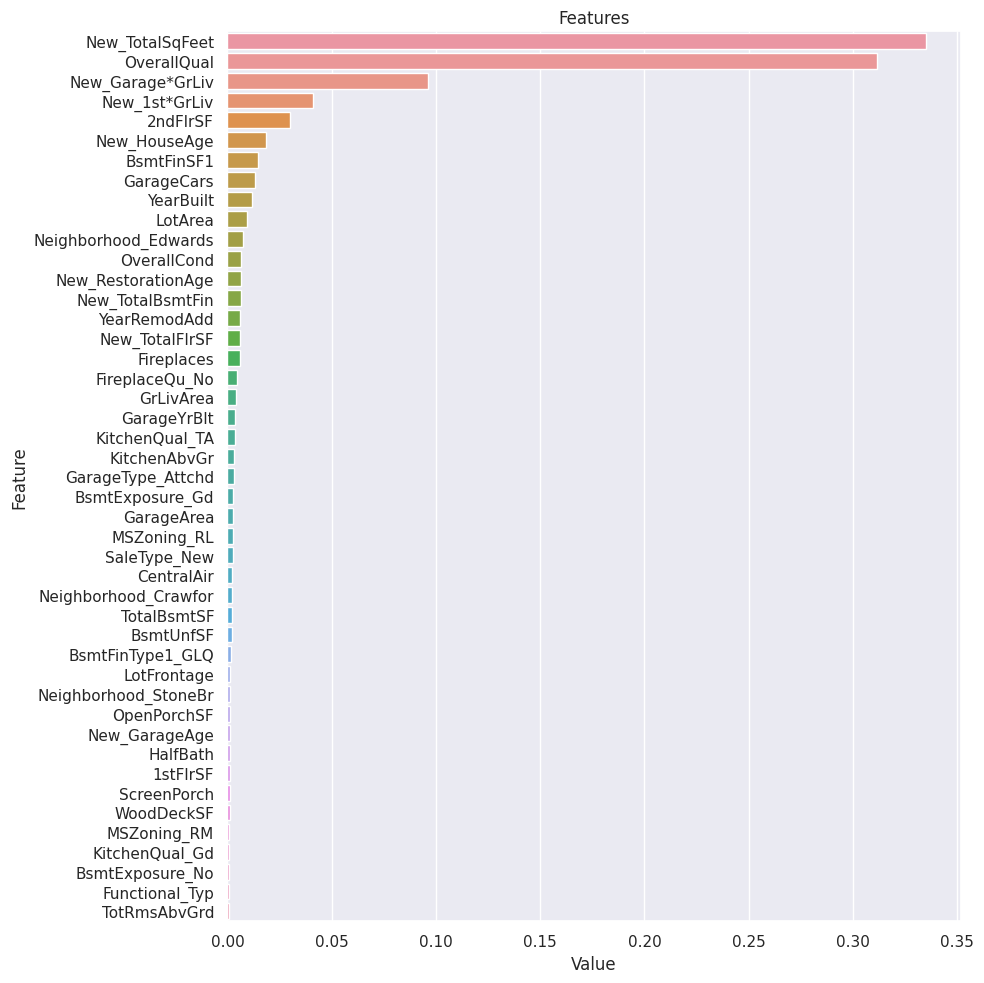

In [146]:
# appyling the function:

plot_importance(model_final, X,start=0, num=45)

<a id = "35"></a>
## 10.4 Prediction

In [147]:
# Make predictions on the test set:

predictions = model_final.predict(test_df.drop(["Id", "SalePrice"], axis=1))

<a id = "36"></a>
## 10.5 Creating a Submission File

In [148]:
# creating a DataFrame with Id and Prediction columns:

submission = pd.DataFrame({
    'Id': test_df["Id"],
    'SalePrice': predictions
})

In [149]:
# saving to CSV file:

submission.to_csv('submission.csv', index=False)

In [150]:
# display first 5 rows:

submission.head()

Id  SalePrice
0  1461 127329.419
1  1462 157764.619
2  1463 185207.513
3  1464 187738.109
4  1465 182789.783